## <b> Global Power Plant Database </b>
<b><em> By: Mr.Saurabh Lad </em></b>

<b><em> Batch: DS2304 </em></b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing CSV File
df=pd.read_csv('database_IND.csv')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
df.head()

No of Rows: 908
No of Columns: 25


country country_long                      name   gppd_idnr  capacity_mw  \
0     IND        India          ACME Solar Tower  WRI1020239          2.5   
1     IND        India       ADITYA CEMENT WORKS  WRI1019881         98.0   
2     IND        India  AES Saurashtra Windfarms  WRI1026669         39.2   
3     IND        India               AGARTALA GT  IND0000001        135.0   
4     IND        India              AKALTARA TPP  IND0000002       1800.0   

   latitude  longitude primary_fuel other_fuel1 other_fuel2  ...  \
0   28.1839    73.2407        Solar         NaN         NaN  ...   
1   24.7663    74.6090         Coal         NaN         NaN  ...   
2   21.9038    69.3732         Wind         NaN         NaN  ...   
3   23.8712    91.3602          Gas         NaN         NaN  ...   
4   21.9603    82.4091         Coal         Oil         NaN  ...   

                     geolocation_source  wepp_id year_of_capacity_data  \
0  National Renewable Energy Laboratory      NaN                   NaN   
1                                   WRI      NaN                   NaN   
2                                   WRI      NaN                   NaN   
3                                   WRI      NaN                2018.0   
4                                   WRI      NaN                2018.0   

  generation_gwh_2013 generation_gwh_2014 generation_gwh_2015  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3          631.777928          617.789264             843.747   
4         1668.290000         3035.550000            5916.370   

   generation_gwh_2016  generation_gwh_2017         generation_data_source  \
0                  NaN                  NaN                            NaN   
1                  NaN                  NaN                            NaN   
2                  NaN                  NaN                            NaN   
3           886.004428           663.774500  Central Electricity Authority   
4          6243.000000          5385.579736  Central Electricity Authority   

   estimated_generation_gwh  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  

[5 rows x 25 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

#### Comment :
- Dataset contain 908 rows with 25 columns.
- Some of feature are with object datatypes and other with float.
- other_fuel3,estimated_generation_gwh,wepp_id,other_fuel2 are empty columns.

# Statistical Analysis

 <b>  Before Going for Statistical exploration of data, first check integrity of data & Missing value </b>

### Data Integrity Check

<b> Check if any whitespace,'?' 'NA' or '-' exist in dataset. </b>

In [5]:
df.isin([' ','NA','-','?']).sum().any()

False

#### Comment:
- No whitespace, NA, '-' exist in dataset.

<b>Let check for any entry which is repeated or duplicated in dataset. </b>

In [6]:
df.duplicated().sum()

0

<b><em> No Duplicate Entry Present in data.

If we Check CSV file and look at dataset head, there are lot of data cleaning operation need to done before performing any EDA and ML modelling.At first sight we can come across following observation in CSV file:

- Lot of missing data in certain columns.
- Lot of  Non relevant data like gppd_idnr,url.
- and many more.

At end data need to clean and we will try to do some feature engineering afterwards to modify some columns.</em></b>
### Start with looking at missing value. 


<b> Before checking null value and missing value imputation , first remove empty columns and non relevalent columns.
    
Columns we are going remove are :
    
- estimated_generation_gwh - Empty
- wepp_id - Empty
- other_fuel2 - 98% data missing
- other_fuel3 - Empty 
- owner - More than 60 % data missing
- year_of_capacity_data - Missing data with single unique value
- country - non relevalent info
- country_long - non relevalent info
- gppd_idnr -non relevalent info
- url - No missing value but of no use
</b>

In [7]:
df.drop(columns=["country","country_long",'url','year_of_capacity_data',
                 'gppd_idnr','owner','other_fuel3','other_fuel2',
                 'estimated_generation_gwh','wepp_id'],axis=1,inplace=True)

In [8]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.083700
generation_gwh_2013                524       57.709251
generation_gwh_2014                507       55.837004
generation_gwh_2015                483       53.193833
generation_gwh_2016                471       51.872247
generation_gwh_2017                465       51.211454
generation_data_source             458       50.440529
commissioning_year                 380       41.850220
latitude                            46        5.066079
longitude                           46        5.066079
geolocation_source                  19        2.092511
name                                 0        0.000000
capacity_mw                          0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000


#### Proposed Strategy to Handle Missing data :

- As Geolocation source is categorical data we can impute it with mode of category.
- longitude and latitude can be impute with mean or median of longitude and latitude. This imputation will not distrub statstical balance of data as mean will be same at the end.
- As commissioning year for most of industrial powerplant is missing(40%) after checking correlation we will decide to keep or drop this features.
- In generation_data_source 50% data is missing and it doesnot have any importance in our analysis. So it is better to drop this feature.
- There are 5 Different columns of GenerationGW-Hours for year 2013 to 2017. Its dive into it further
    - It is important feature in for coal and hydro powerplant.
    - It is natural to have missing data in this category. As Oil,Gas based Powerplant operated in intermitant periodic way and some renewable powerplant like wind,tide are operated seasonaly.
    - Some new powerplant commission between 2013 and 2018. For these powerplant some data will definitely available.
    - We cannot do any mean or median imputation here as different powerplant have different generation capacity & Generation per year depend on runtime of powerplant.
    - We all know old powerplant normally kept off unless more demand of generation required. Reason to kept is low efficiency & high operating cost.
    - We can neglect real value data for such important feature. We will keep this feature along with missing value and perform further investigation.
- Other_fuel1 is another feature of some importance with missing value. Lets dive into it :
    - Not every powerplant build to work with alternate fuel.
    - Idea of other fuel is totally irrelevant to renewable energy source based powerplant like solar,wind,hydro.
    - First talk about powerplant for which concept of other fuel is applicable. We can impute them based domain knowledge.
        - Alternate Fuel of Coal based powerplant mostly is Oil or cogeneration.
        - Alternate Fuel of Industrial Oil based powerplant is Gas.
        - Alternate Fuel of Industrial Gas based powerplant is Oil.
        - We cannot define any alternative fuel for nuclear powerplant as it sole based on plant design & so many option.
    - For Renewable energy source based powerplant no alternate fuel needed. As it is categorical feature we can impute these powerplant with "Not Applicable". At end we are going Encoding these labels, 'Not Applicable' will be just one other additional label in encoding. Making no alternation on final result.

### Missing value Impuatation

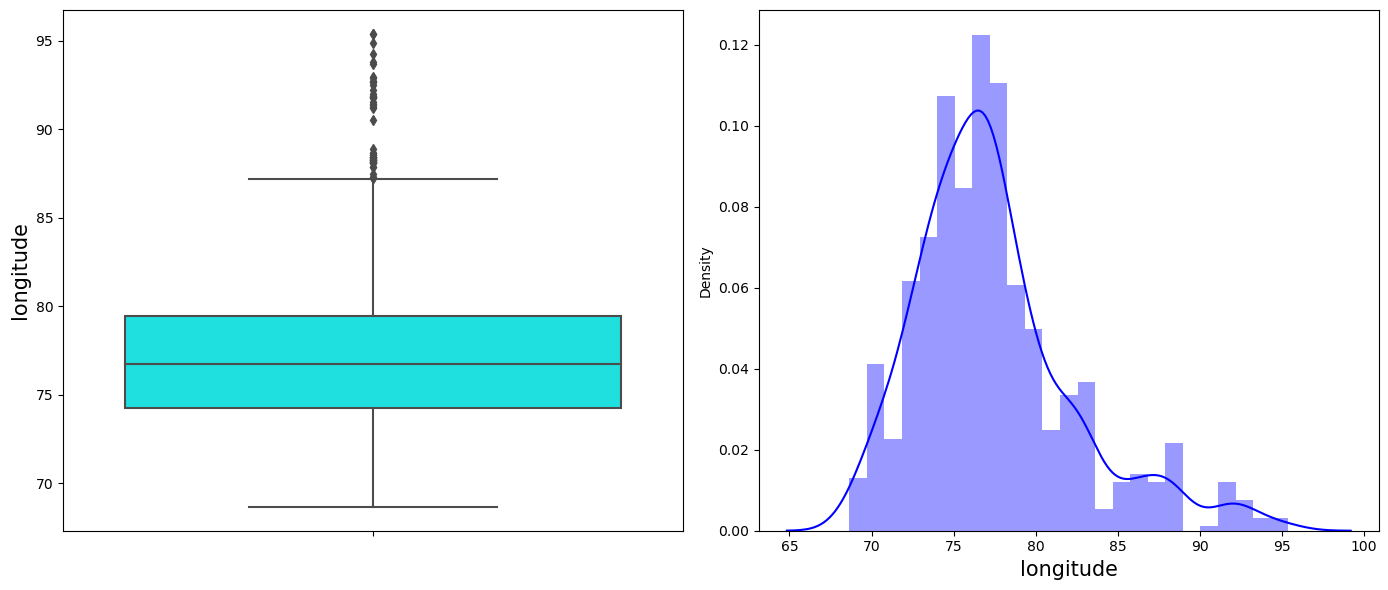

In [9]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='longitude', data=df,color='cyan')
plt.ylabel('longitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['longitude'], color='b')
plt.xlabel('longitude',fontsize=15)
plt.tight_layout()
plt.show()

<b> Based on presense of outliers we will impute longitude we with median. </b>

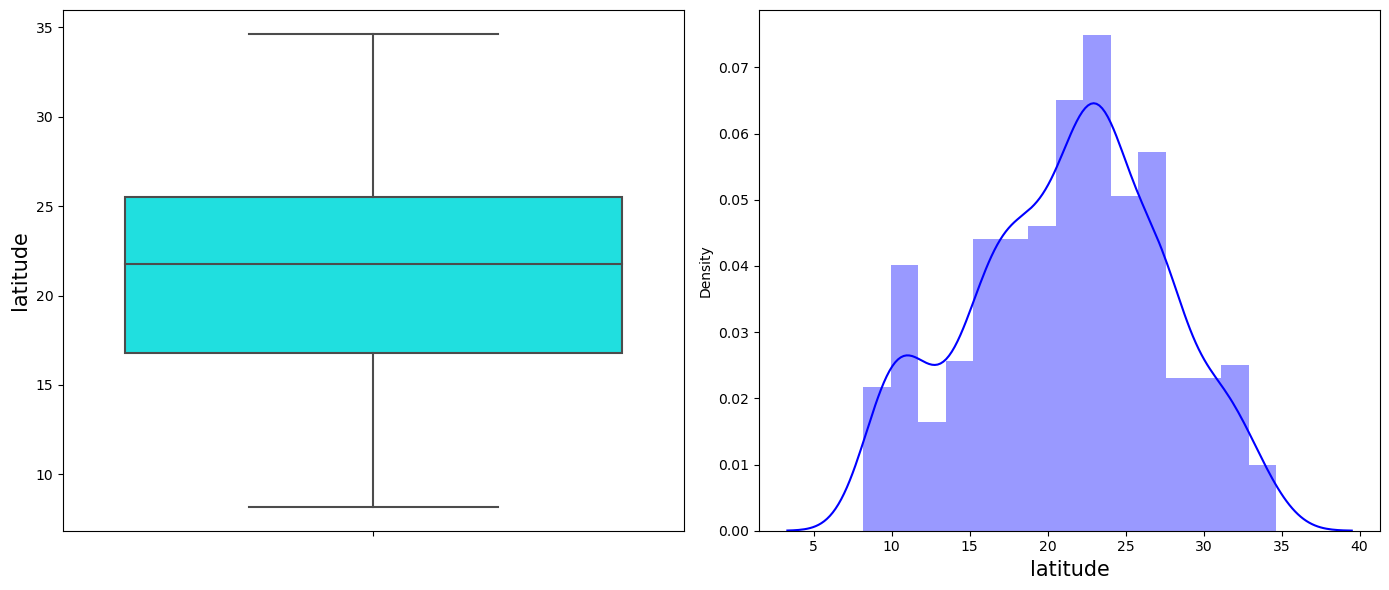

In [10]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot( y='latitude', data=df,color='cyan')
plt.ylabel('latitude',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['latitude'], color='b')
plt.xlabel('latitude',fontsize=15)
plt.tight_layout()
plt.show()

<b> Based on absense of outliers we will impute latitude we with mean. </b>

In [11]:
# Missing Value Imputation of geolocation with mode
df['geolocation_source'] = df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])
# Missing Value Imputation of longitude with median
df['longitude'] = df['longitude'].fillna(df['longitude'].median())
# Missing Value Imputation of latitude with mean
df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [12]:
#Finding what percentage of data is missing from the dataset
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                        Missing Values  % Missing data
other_fuel1                        709       78.083700
generation_gwh_2013                524       57.709251
generation_gwh_2014                507       55.837004
generation_gwh_2015                483       53.193833
generation_gwh_2016                471       51.872247
generation_gwh_2017                465       51.211454
generation_data_source             458       50.440529
commissioning_year                 380       41.850220
name                                 0        0.000000
capacity_mw                          0        0.000000
latitude                             0        0.000000
longitude                            0        0.000000
primary_fuel                         0        0.000000
source                               0        0.000000
geolocation_source                   0        0.000000


### Statstical Matrix

In [13]:
df.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   908.000000  908.000000  908.000000          528.000000   
mean    321.046378   21.196189   77.410936         1996.876894   
std     580.221767    6.088110    4.783873           17.047817   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.837500   17.057825   74.390250         1988.000000   
50%      60.000000   21.278850   76.719250         2000.000000   
75%     388.125000   25.183775   79.211600         2011.250000   
max    4760.000000   34.649000   95.408000         2018.000000   

       generation_gwh_2013  generation_gwh_2014  generation_gwh_2015  \
count           384.000000           401.000000           425.000000   
mean           2304.059202          2420.393316          2414.072373   
std            3794.767492          4013.558173          4183.203199   
min               0.000000             0.000000             0.000000   
25%             244.458088           223.650436           174.174750   
50%             797.063475           805.760000           701.027250   
75%            2795.021500          3034.575000          3080.000000   
max           27586.200000         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  
count           437.000000           443.000000  
mean           2453.936292          2531.754458  
std            4152.038216          4187.236364  
min               0.000000             0.000000  
25%             187.193669           177.643170  
50%             716.728350           807.601700  
75%            3263.483000          3258.785000  
max           30015.000000         35116.000000

#### Observation:
- Bigest Powerplant has power generation capacity of 4760 MW.
- In each Generation-GWHours columns Mean is greater than Median.
- Powerplants are located in latitude range of 8.1689 to 34.6490 while longitudal range is 68.64 to 95.4080.
- Oldest powerplant commission date back to 1927 and most recent powerplant is build in 2018. We will check in which timeframe most of powerplants are commission.
- Median of capacity MW is 60 MW. This suggest that there are lot of small capacity powerplant in dataset.

<b><em> We have two different Target feature for regression and classification model. LetStart exploring both Target Feature</em> </b>

## Regression Target feature - Capacity

<b> Before visualing feature let find details about Smallest & Biggest Powerplant </b>

In [14]:
print('Minimum Capacity of Powerplant:',df.capacity_mw.min())
print('Maximum Capacity of Powerplant:',df.capacity_mw.max())

Minimum Capacity of Powerplant: 0.0
Maximum Capacity of Powerplant: 4760.0


In [15]:
df.loc[df.capacity_mw==4760]

name  capacity_mw  latitude  longitude primary_fuel  \
881  VINDH_CHAL STPS       4760.0   24.0983    82.6719         Coal   

    other_fuel1  commissioning_year                         source  \
881         Oil              2002.0  Central Electricity Authority   

    geolocation_source  generation_gwh_2013  generation_gwh_2014  \
881                WRI             26761.39              27594.0   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
881              29047.0              30015.0              35116.0   

            generation_data_source  
881  Central Electricity Authority

In [16]:
df.loc[df.capacity_mw==0]

name  capacity_mw  latitude  \
830  Tata BP - Electronics City Solar Panel Plant          0.0   12.8491   

     longitude primary_fuel other_fuel1  commissioning_year  \
830    77.6752        Solar         NaN                 NaN   

                          source geolocation_source  generation_gwh_2013  \
830  Tata BP Solar India Limited     Industry About                  NaN   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
830                  NaN                  NaN                  NaN   

     generation_gwh_2017 generation_data_source  
830                  NaN                    NaN

#### Comment :
- <b> Biggest powerplant in India as per database is VINDH_CHAL STPS with Power generation capacity of 4760 MW.</b> As Name suggest it is Thermal powerplant with Coal as Primary Fuel and alternate fuel is oil. It is commission in year 2002.
- Smallest power plant is mention as Tata BP - Electronics City Solar Panel Plant with capacity of 0 MW. <b>This must be data entry error as If powerplant is commission it cannot have capacity of 0 MW.</b>

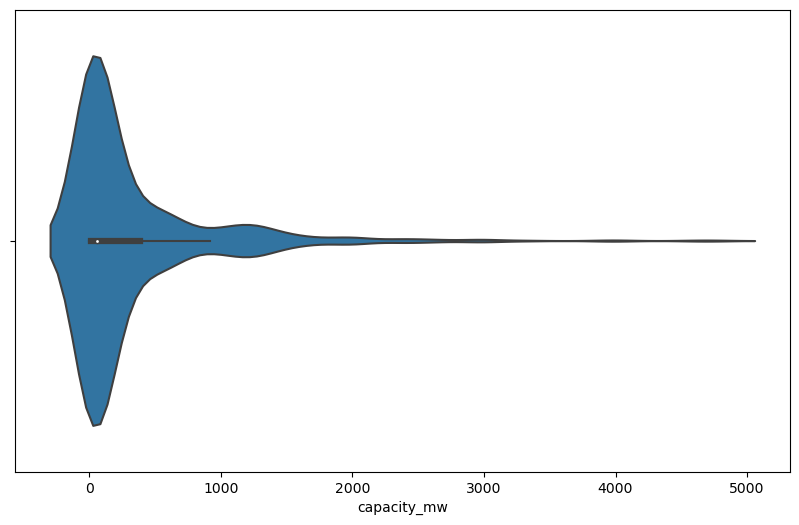

In [17]:
plt.figure(figsize=(10,6))
sns.violinplot(df.capacity_mw)
plt.show()

<b> We can see there are very powerplant of capacity more than 1500 MW. Let check</b>


In [18]:
df.loc[df.capacity_mw >1500].shape

(37, 15)

<b> There only 15 powerplant of capacity more than 1500 MW.</b>

In [19]:
pd.crosstab(df['capacity_mw'],df["primary_fuel"], margins=True).T.style.background_gradient(cmap='summer_r')

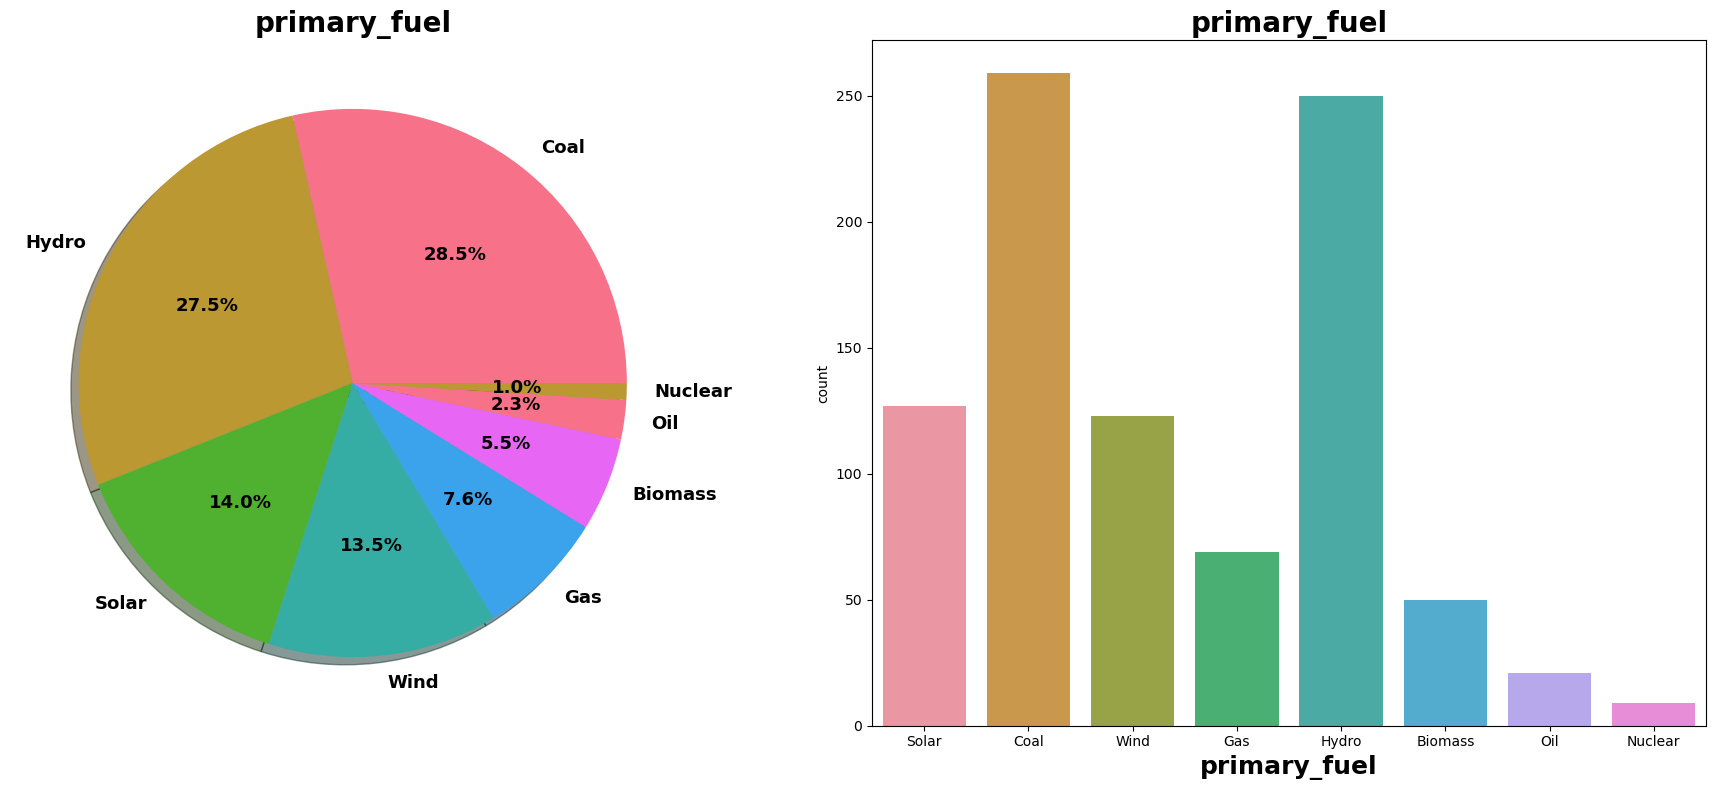

In [20]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(18,8))
df['primary_fuel'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('primary_fuel', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('primary_fuel',data=df,ax=ax[1])
ax[1].set_title('primary_fuel',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("primary_fuel",fontsize=18,fontweight ='bold')
plt.show()

In [21]:
df.primary_fuel.value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

#### Comment:
- Maximum Number of powerplant are coal based powerplant followed by Hydro energy based powerplants.
- <b>Around 40 % Power plant are Unconventional powerplant mainly based on Non Renewable energy resorces.</b>
- There are only 9 Nuclear powerplant. Usually these powerplant build for high capacity.<b> It will be interesting to look for capacity of these powerplant.</b>

<b> Let find Total Generation capacity of all powerplant, afterwards we will look for capacity of powerplant according to fuel type.</b> 

In [22]:
print('Total Power Generation Capacity of all Power Plants:',df['capacity_mw'].sum(),'MW')

Total Power Generation Capacity of all Power Plants: 291510.11100000003 MW


<b> India's Total Power Generation Capacity of is 291510.11 MW.

Now Let check sector wise Capacity.
</b>


In [23]:
df["capacity_mw"].groupby(df["primary_fuel"]).agg([sum])

sum
primary_fuel            
Biomass         1003.260
Coal          201423.220
Gas            25123.871
Hydro          46331.570
Nuclear         8780.000
Oil             1978.840
Solar           2757.500
Wind            4111.850

#### Comment :
<b> Out of Total PowerGeneration Maximum comes from Coal. 

Here comes another interesting observation which we already suspected. Overall Power Generation capacity of Nuclear powerplants is greater than Unconventional Energy sources based powerplant (biomass, wind,solar) combined.</b>

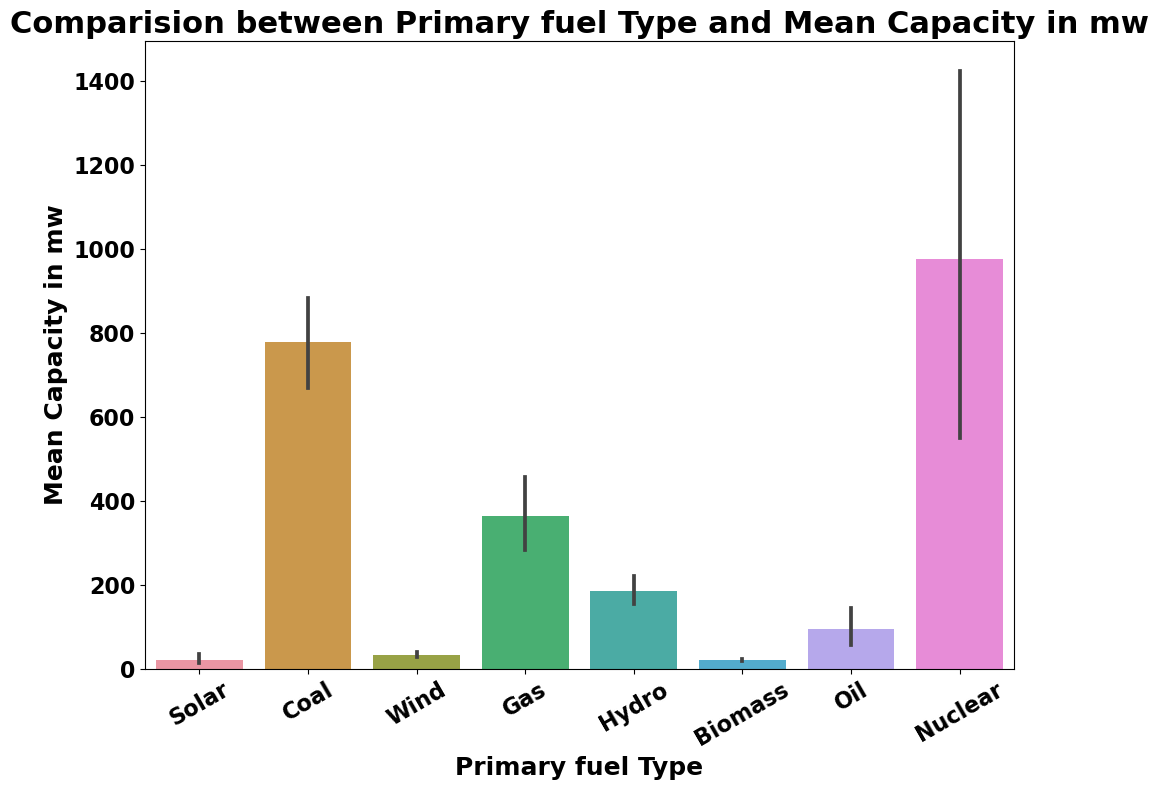

In [24]:
#Lets check the relation between primary_fuel and  Average capacity_mw
plt.figure(figsize = (10,8))
y = df["capacity_mw"]
p = sns.barplot(x = "primary_fuel", y = "capacity_mw", data = df)
plt.title('Comparision between Primary fuel Type and Mean Capacity in mw', fontsize=22, fontweight='bold')
p.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
p.set_ylabel('Mean Capacity in mw',fontsize=18,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold',rotation=30)
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

<b> Above result is obvious as only 9 Nuclear powerplant so its mean Capacity is higher.</b>

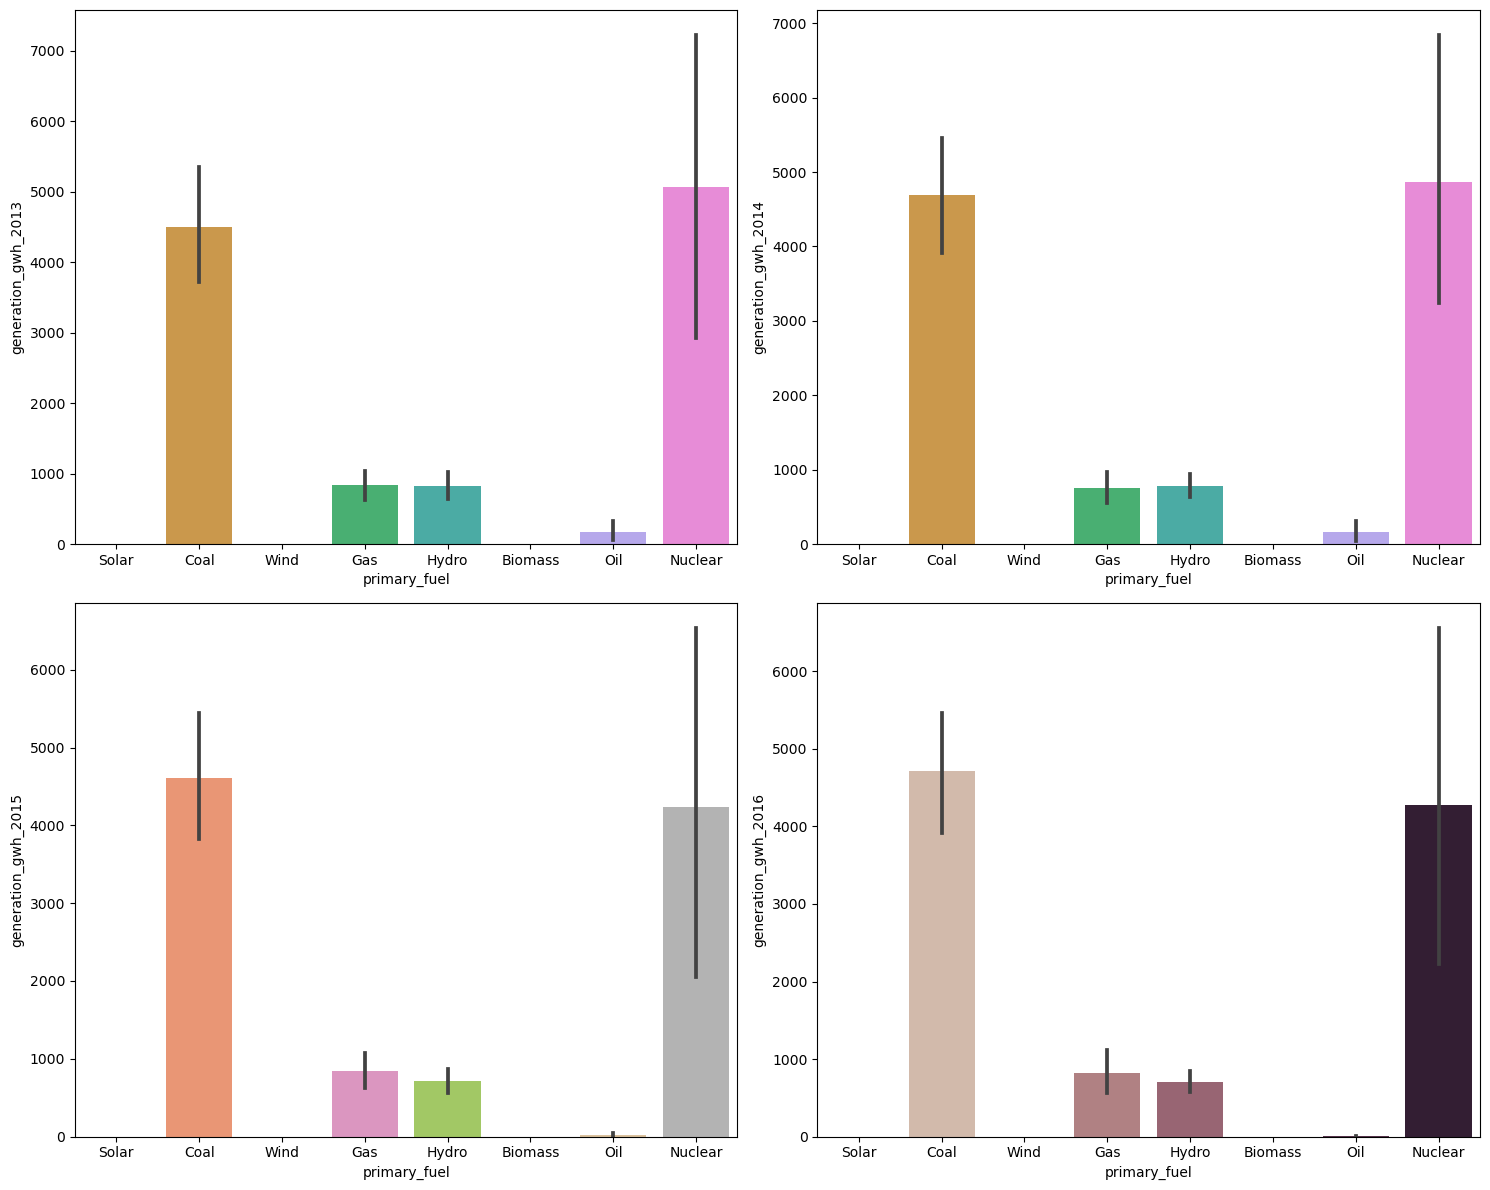

In [25]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2013
sns.barplot(x='primary_fuel',y='generation_gwh_2013',ax=axes[0,0],data=df)

# Checking generation growth in 2014
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,1],data=df)

# Checking generation growth in 2015
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[1,0],data=df,palette="Set2")

# Checking generation growth in 2016
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()



#### Comment:
- From the graph we can see that Nuclear has high mean electrical generation reports for all the years followed by Coal.
Reason is high efficieny of Nuclear powerplants.
- Other fuel types have very less contribution to power generation.

### Location vs Primary Fuel

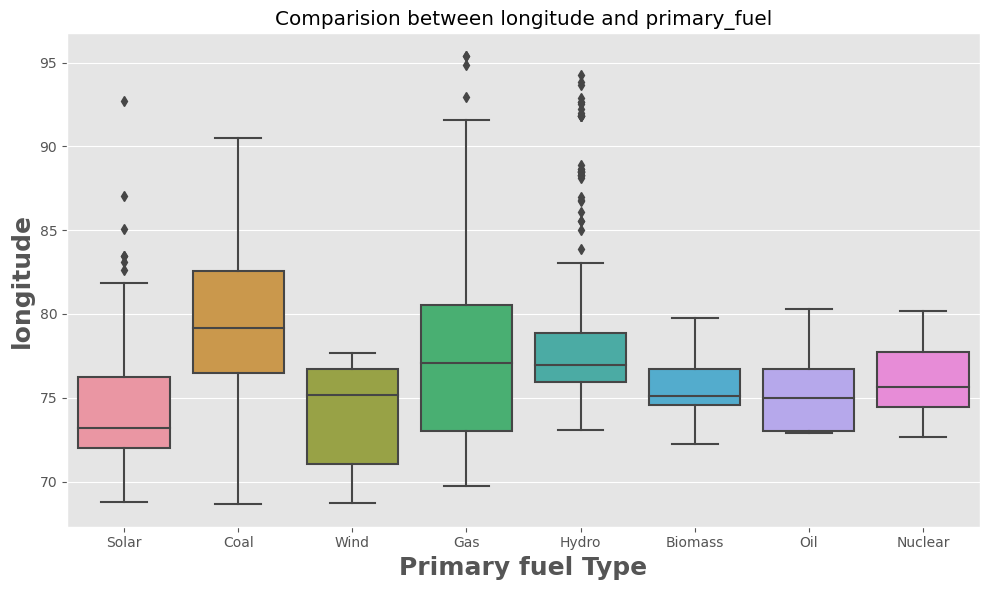

In [26]:
# Let's check how the primary_fuel is reated to longitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["longitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

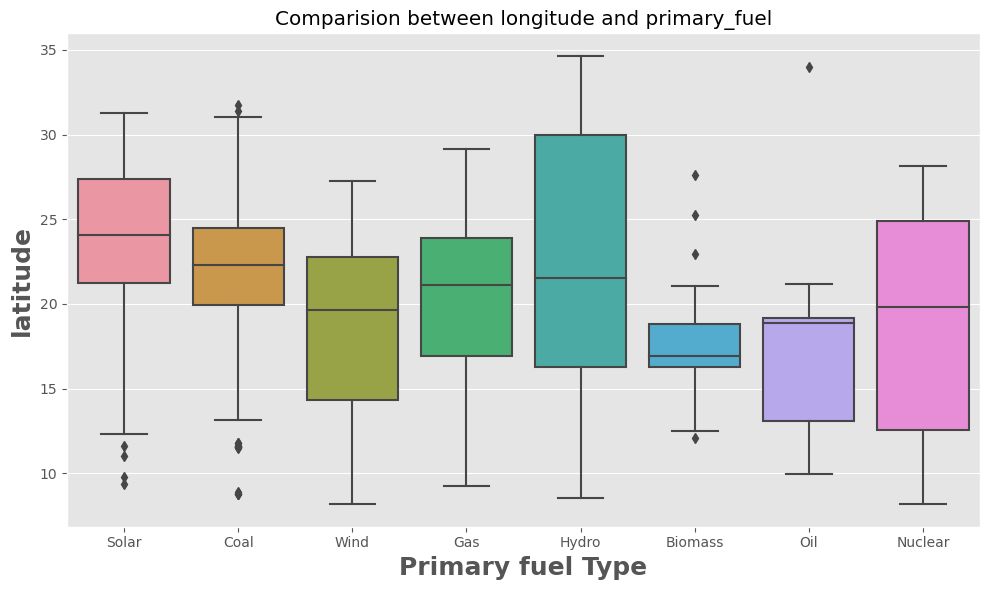

In [27]:
# Let's check how the primary_fuel is reated to Latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and primary_fuel')
a = sns.boxplot(df['primary_fuel'],df["latitude"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

#### Comment:
- Location is important feature specially for Nuclear powerplants. These plants lies in between 15 to 25 latitude and longitudnal range of 75 to 88 degree.
- We can also see  solar power plant are mostly establish in certain range of latitude and longitude. This might be due to clear and intense sunlight with minimum humidity.

### Location vs Capacity

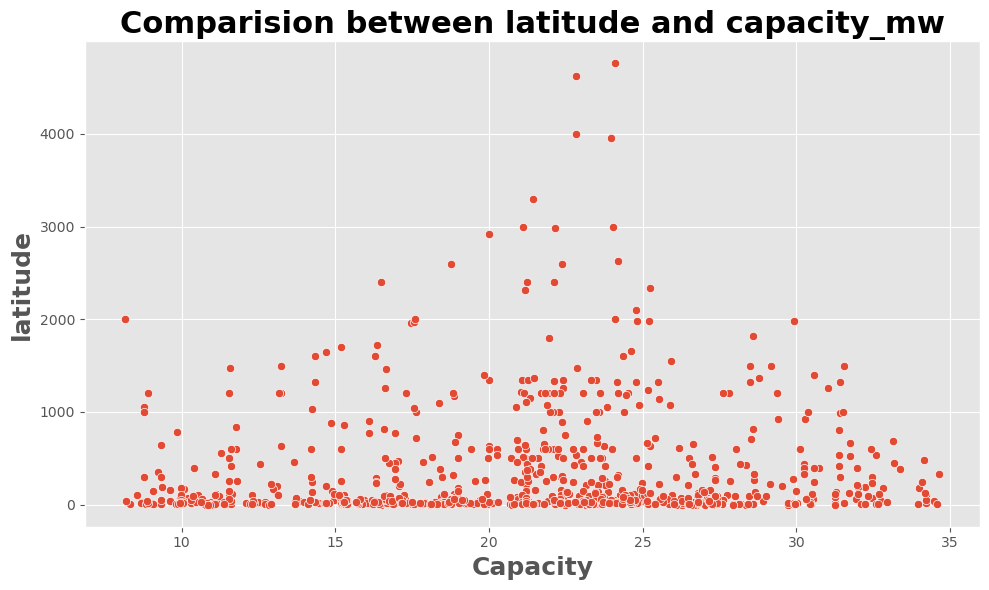

In [28]:
# Let's check how the capacity is reated to latitude of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between latitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.scatterplot(df['latitude'],df["capacity_mw"])
a.set_xlabel('Capacity',fontsize=18,fontweight ='bold')
a.set_ylabel('latitude',fontsize=18,fontweight ='bold')
plt.show()

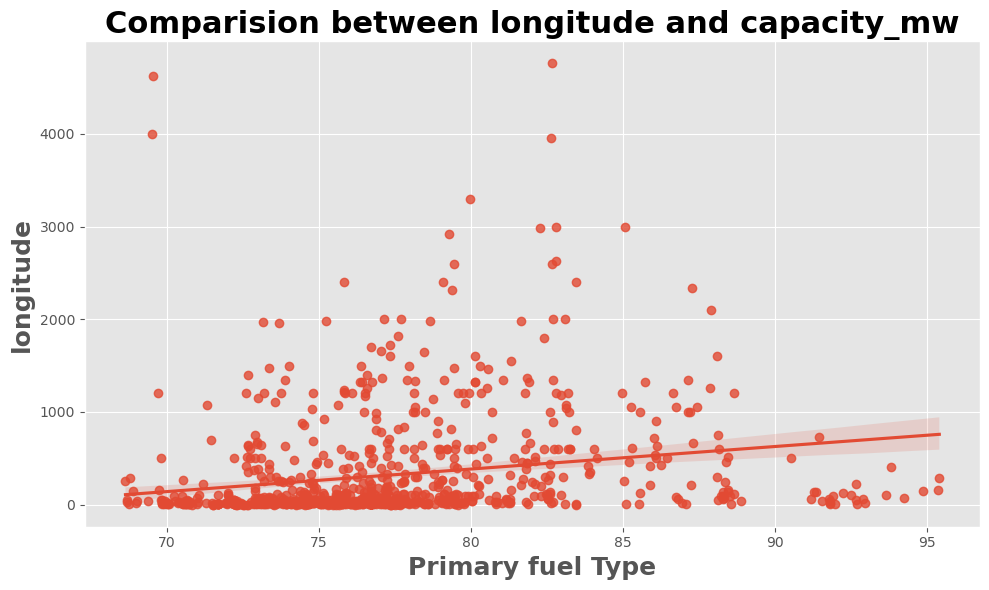

In [35]:
# Let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparision between longitude and capacity_mw',fontsize=22, fontweight='bold')
a= sns.regplot(df['longitude'],df["capacity_mw"])
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('longitude',fontsize=18,fontweight ='bold')
plt.show()

<b> Nothing significant insight gain from above plots</b>
### Commission age vs primary fuel<b> Nothing significant insight gain from above plots</b>

In [29]:
# Lets extract power plant age from commissioning year by subtracting it from the year 2018
df['Power_plant_age'] = 2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)
print('The oldest powerplant Age :',df.Power_plant_age.max())
print('The youngest powerplant Age :',df.Power_plant_age.min())

The oldest powerplant Age : 91.0
The youngest powerplant Age : 0.0


In [30]:
df.loc[df.Power_plant_age==91]

name  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
729  SIVASAMUNDRUM         42.0   12.3082     77.165        Hydro         NaN   

                            source geolocation_source  generation_gwh_2013  \
729  Central Electricity Authority                WRI            217.97465   

     generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
729            220.82035             215.3777             144.4143   

     generation_gwh_2017         generation_data_source  Power_plant_age  
729            175.92595  Central Electricity Authority             91.0

<b> Oldest Powerplant is SIVASAMUNDRUM which is hydro power based plant with generation capacity of 42 MW.</b>

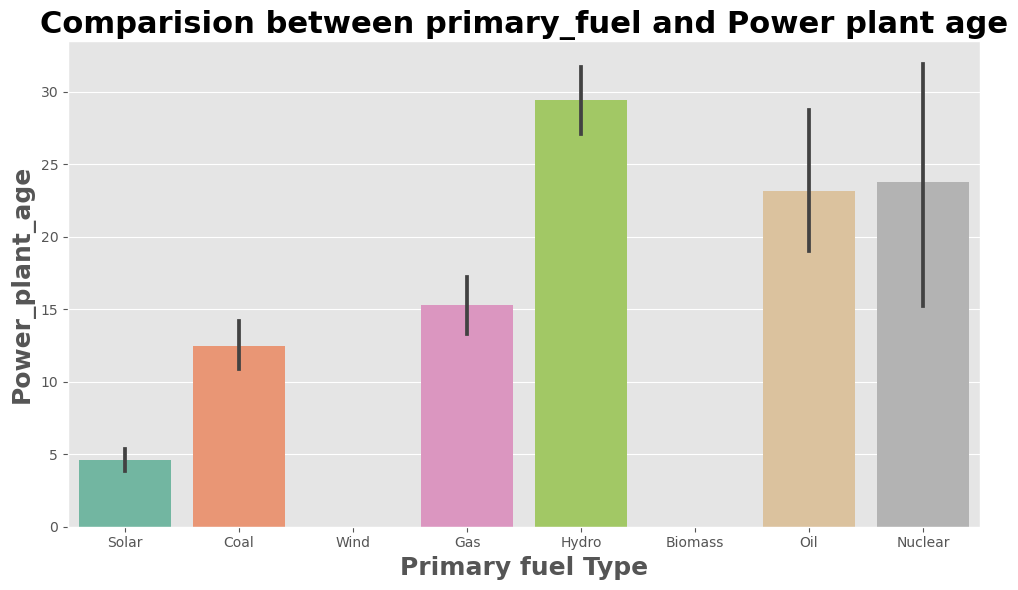

In [31]:
#Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
plt.title("Comparision between primary_fuel and Power plant age", fontsize=22, fontweight='bold')
a= sns.barplot(x = "primary_fuel", y = "Power_plant_age", data = df,palette="Set2")
a.set_xlabel('Primary fuel Type',fontsize=18,fontweight ='bold')
a.set_ylabel('Power_plant_age',fontsize=18,fontweight ='bold')
plt.show()

<AxesSubplot:title={'center':'Comparision between Power_plant_age and capacity_mw'}, xlabel='Power_plant_age', ylabel='capacity_mw'>

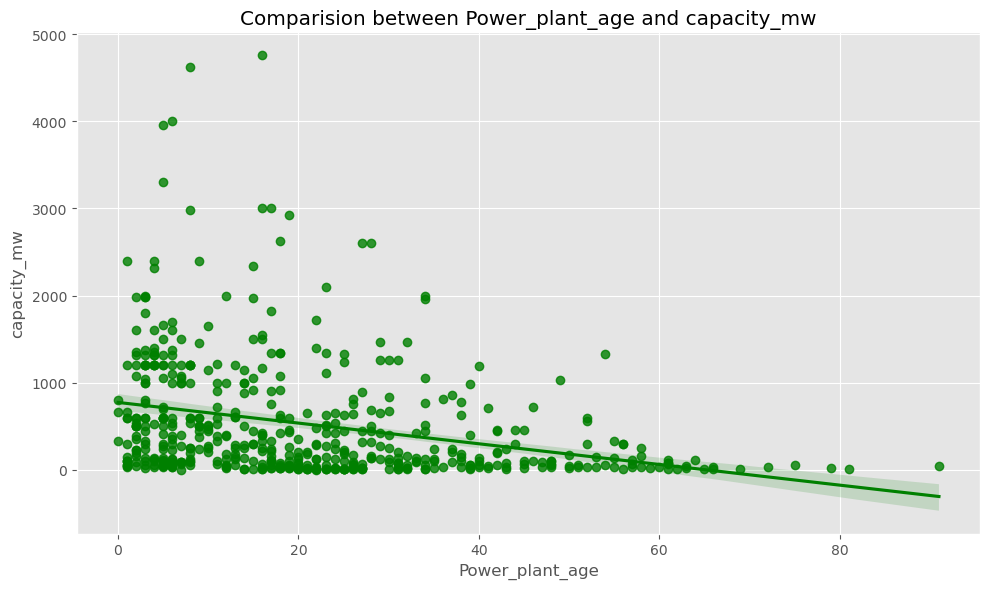

In [32]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = "g")

- There is negative linear relationship between feature and label.
- We can say that the capacity of older plants is very less than compared to the powerplants which are stated recently.

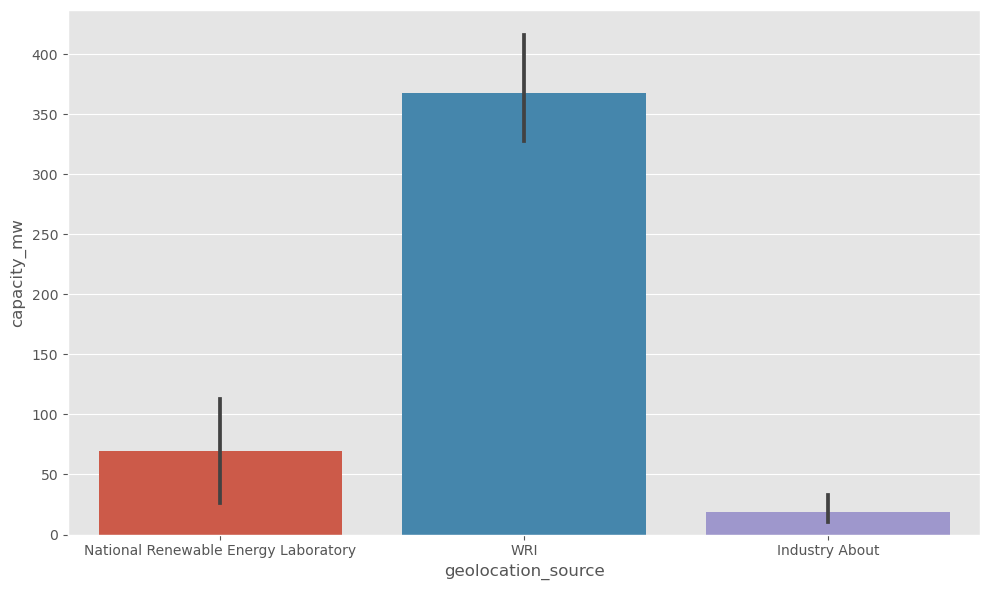

In [33]:
#Lets check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = "geolocation_source", y = "capacity_mw", data = df)
plt.show()

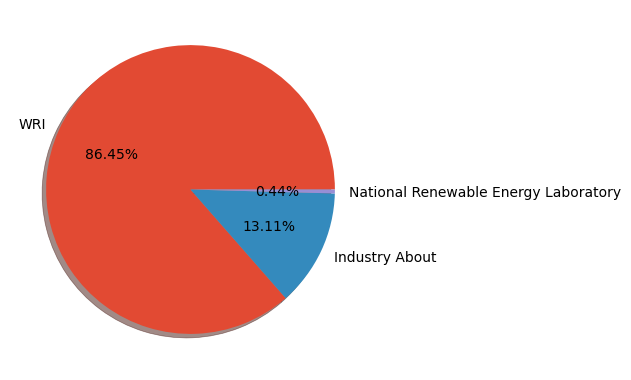

In [34]:
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(6,5))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

The capacity of geological source WRI is maximum which has capacity more than 350 megawatts. The geological source Industry About has less capacity.

## Distribution of features

In [36]:
Numerical=['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
           'generation_gwh_2016', 'generation_gwh_2017', 'Power_plant_age']

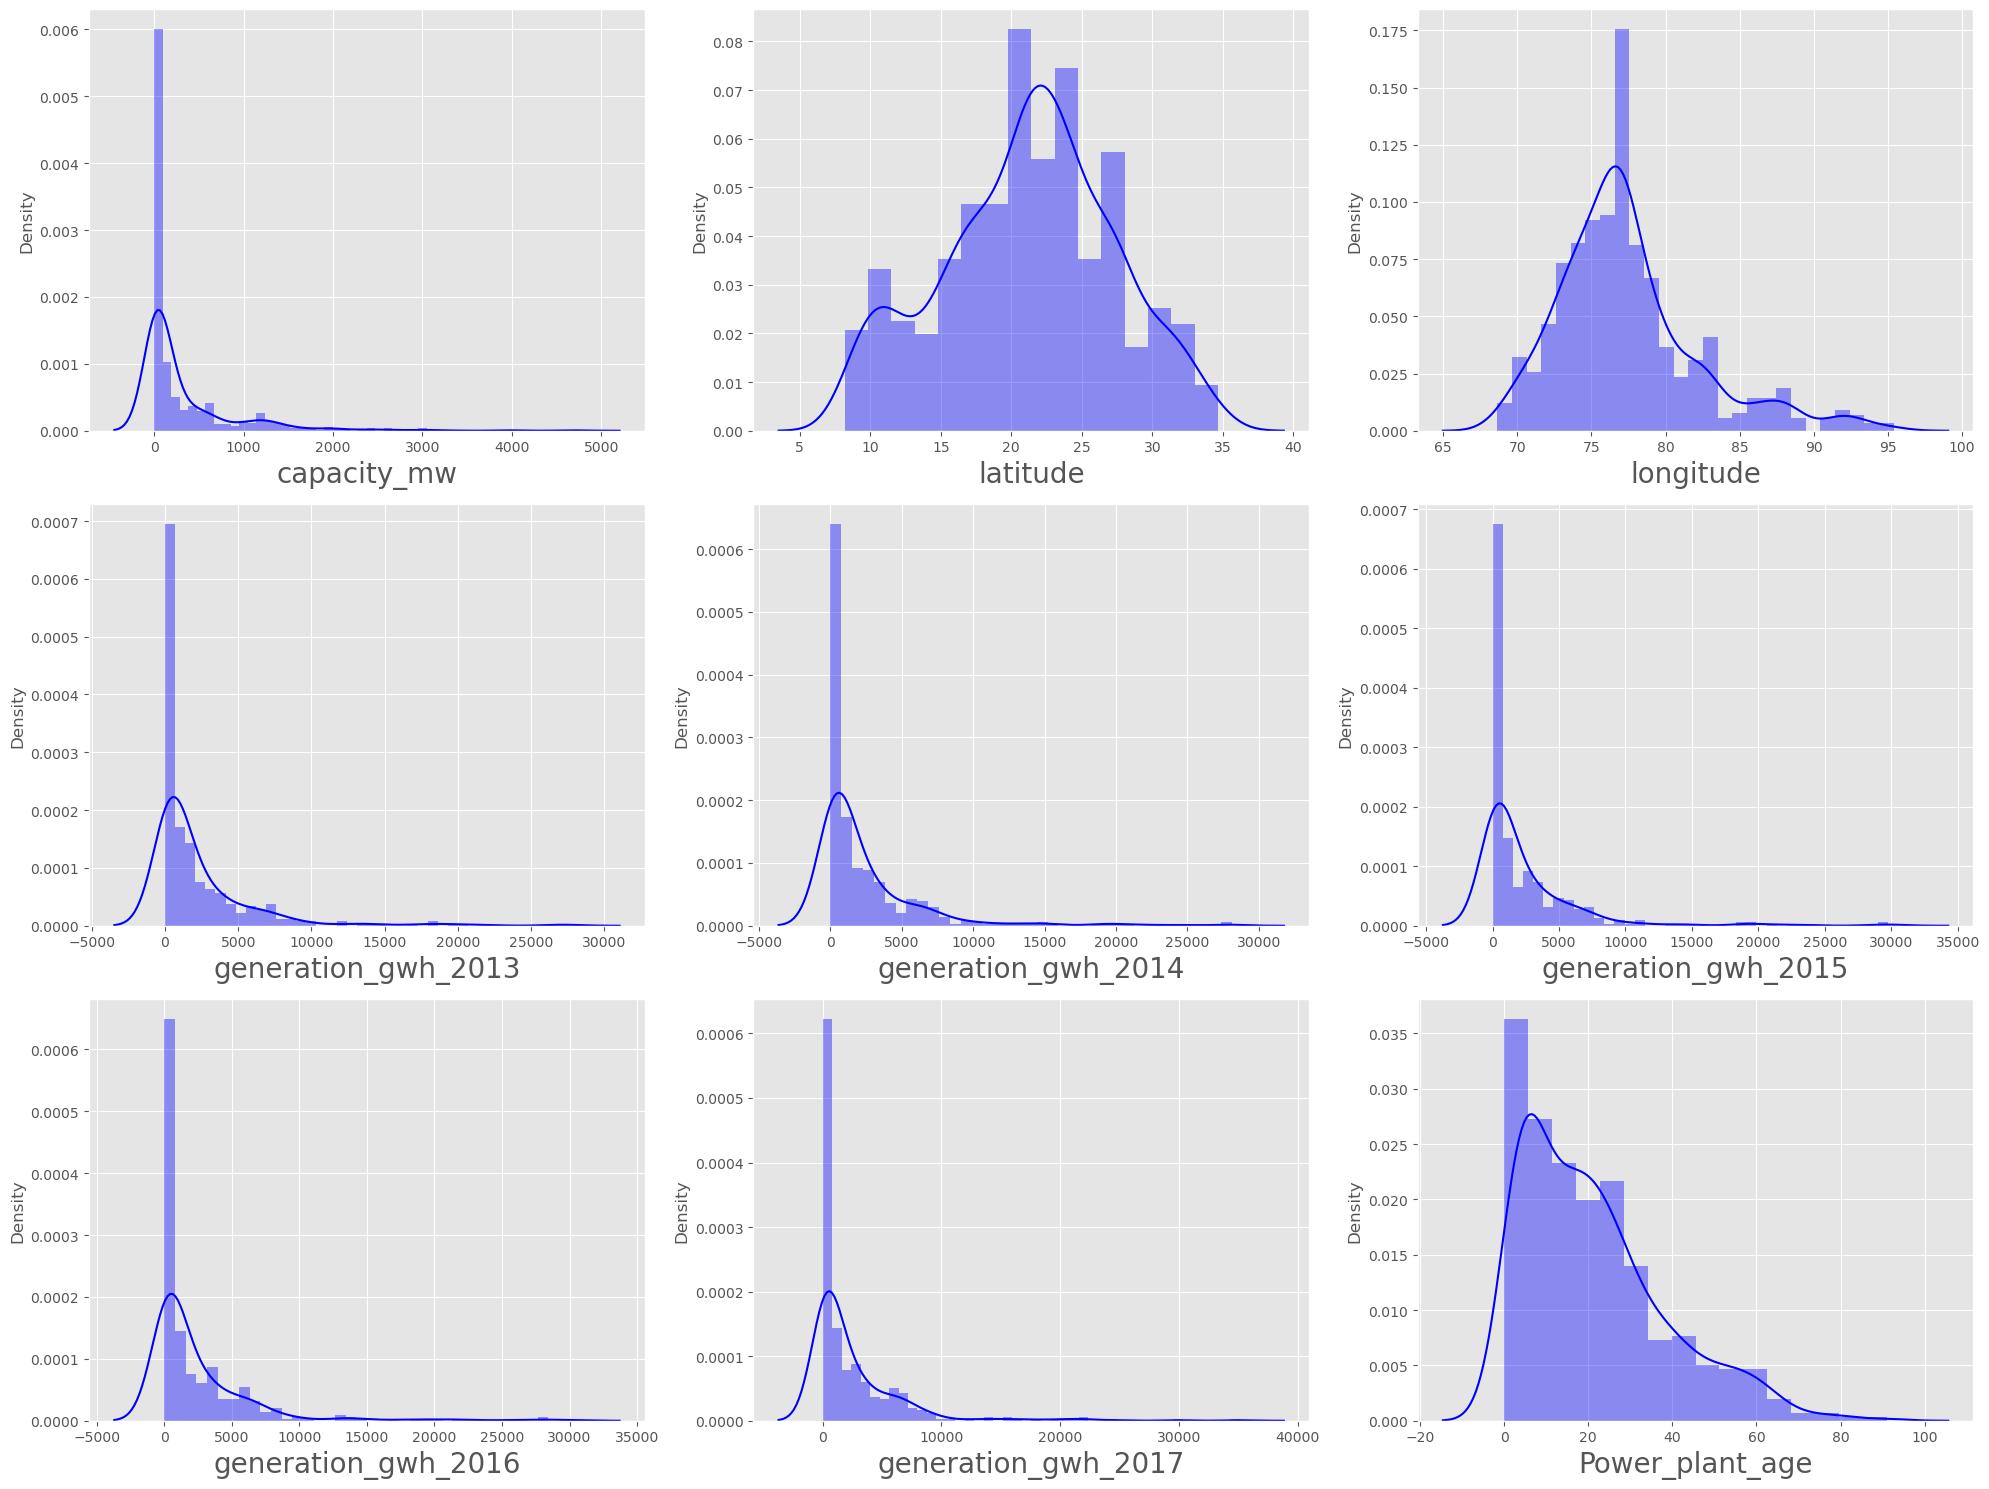

In [37]:
# Checking how the data has been distributed in each column

plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],color='b')
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

#### Comment:
- From the above distributionplot we can observe that the data is not normally distributed in all the columns except latitude and longitude.
- In most of the columns the mean is greater than the median which means they are skewed to right.
- We will remove the skewness in all these columns except the label later.

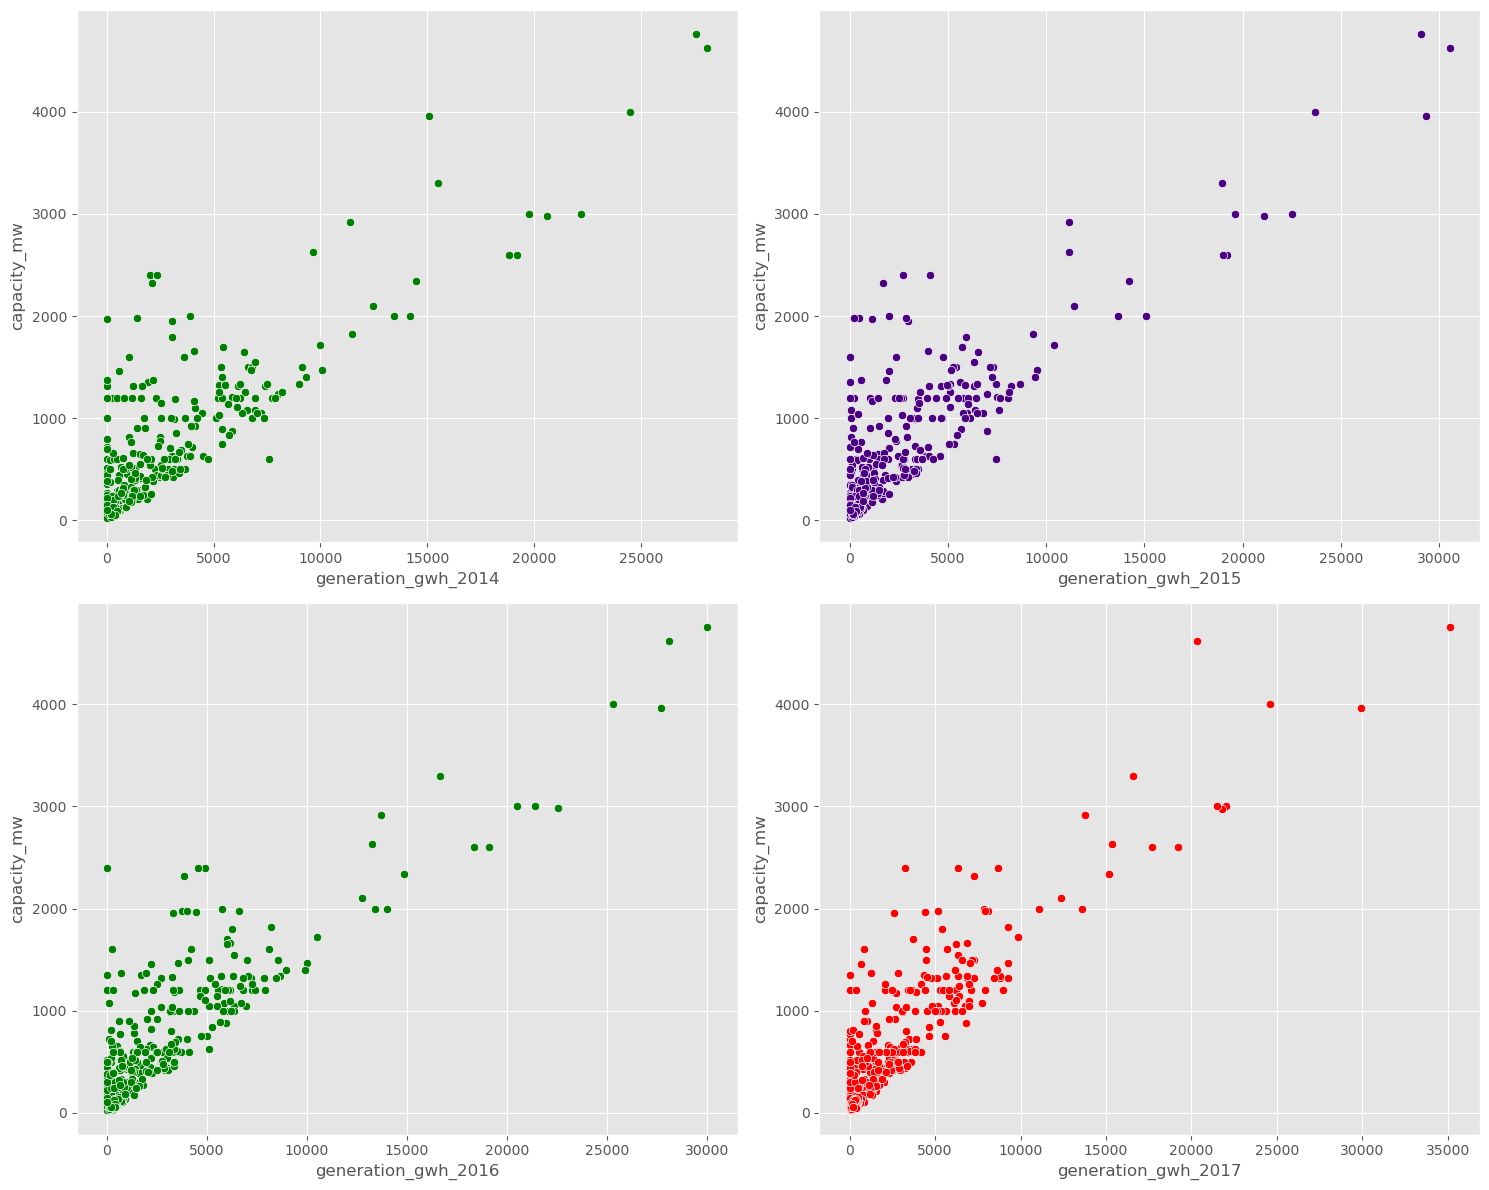

In [38]:
fig,axes=plt.subplots(2,2,figsize=(15,12))

# Checking generation growth in 2014
sns.scatterplot(x='generation_gwh_2014',y='capacity_mw',ax=axes[0,0],data=df,color="g")

# Checking generation growth in 2015
sns.scatterplot(x='generation_gwh_2015',y='capacity_mw',ax=axes[0,1],data=df,color="indigo")

# Checking generation growth in 2016
sns.scatterplot(x='generation_gwh_2016',y='capacity_mw',ax=axes[1,0],data=df,color="g")

# Checking generation growth in 2017
sns.scatterplot(x='generation_gwh_2017',y='capacity_mw',ax=axes[1,1],data=df,color="r")
plt.show()

#### Observation:
- There is a positive linear relationship between the capacity and the electricity generation reported for the years mentioned.
- The plot shows the electricity generation reported for the years 2014,2015,2016,2017 have high capacity of above 1000mw. Also the power generation growth is more than 5000gwh in all the years.
- As the electricity generation growth increases, the capacity of plant also increases.

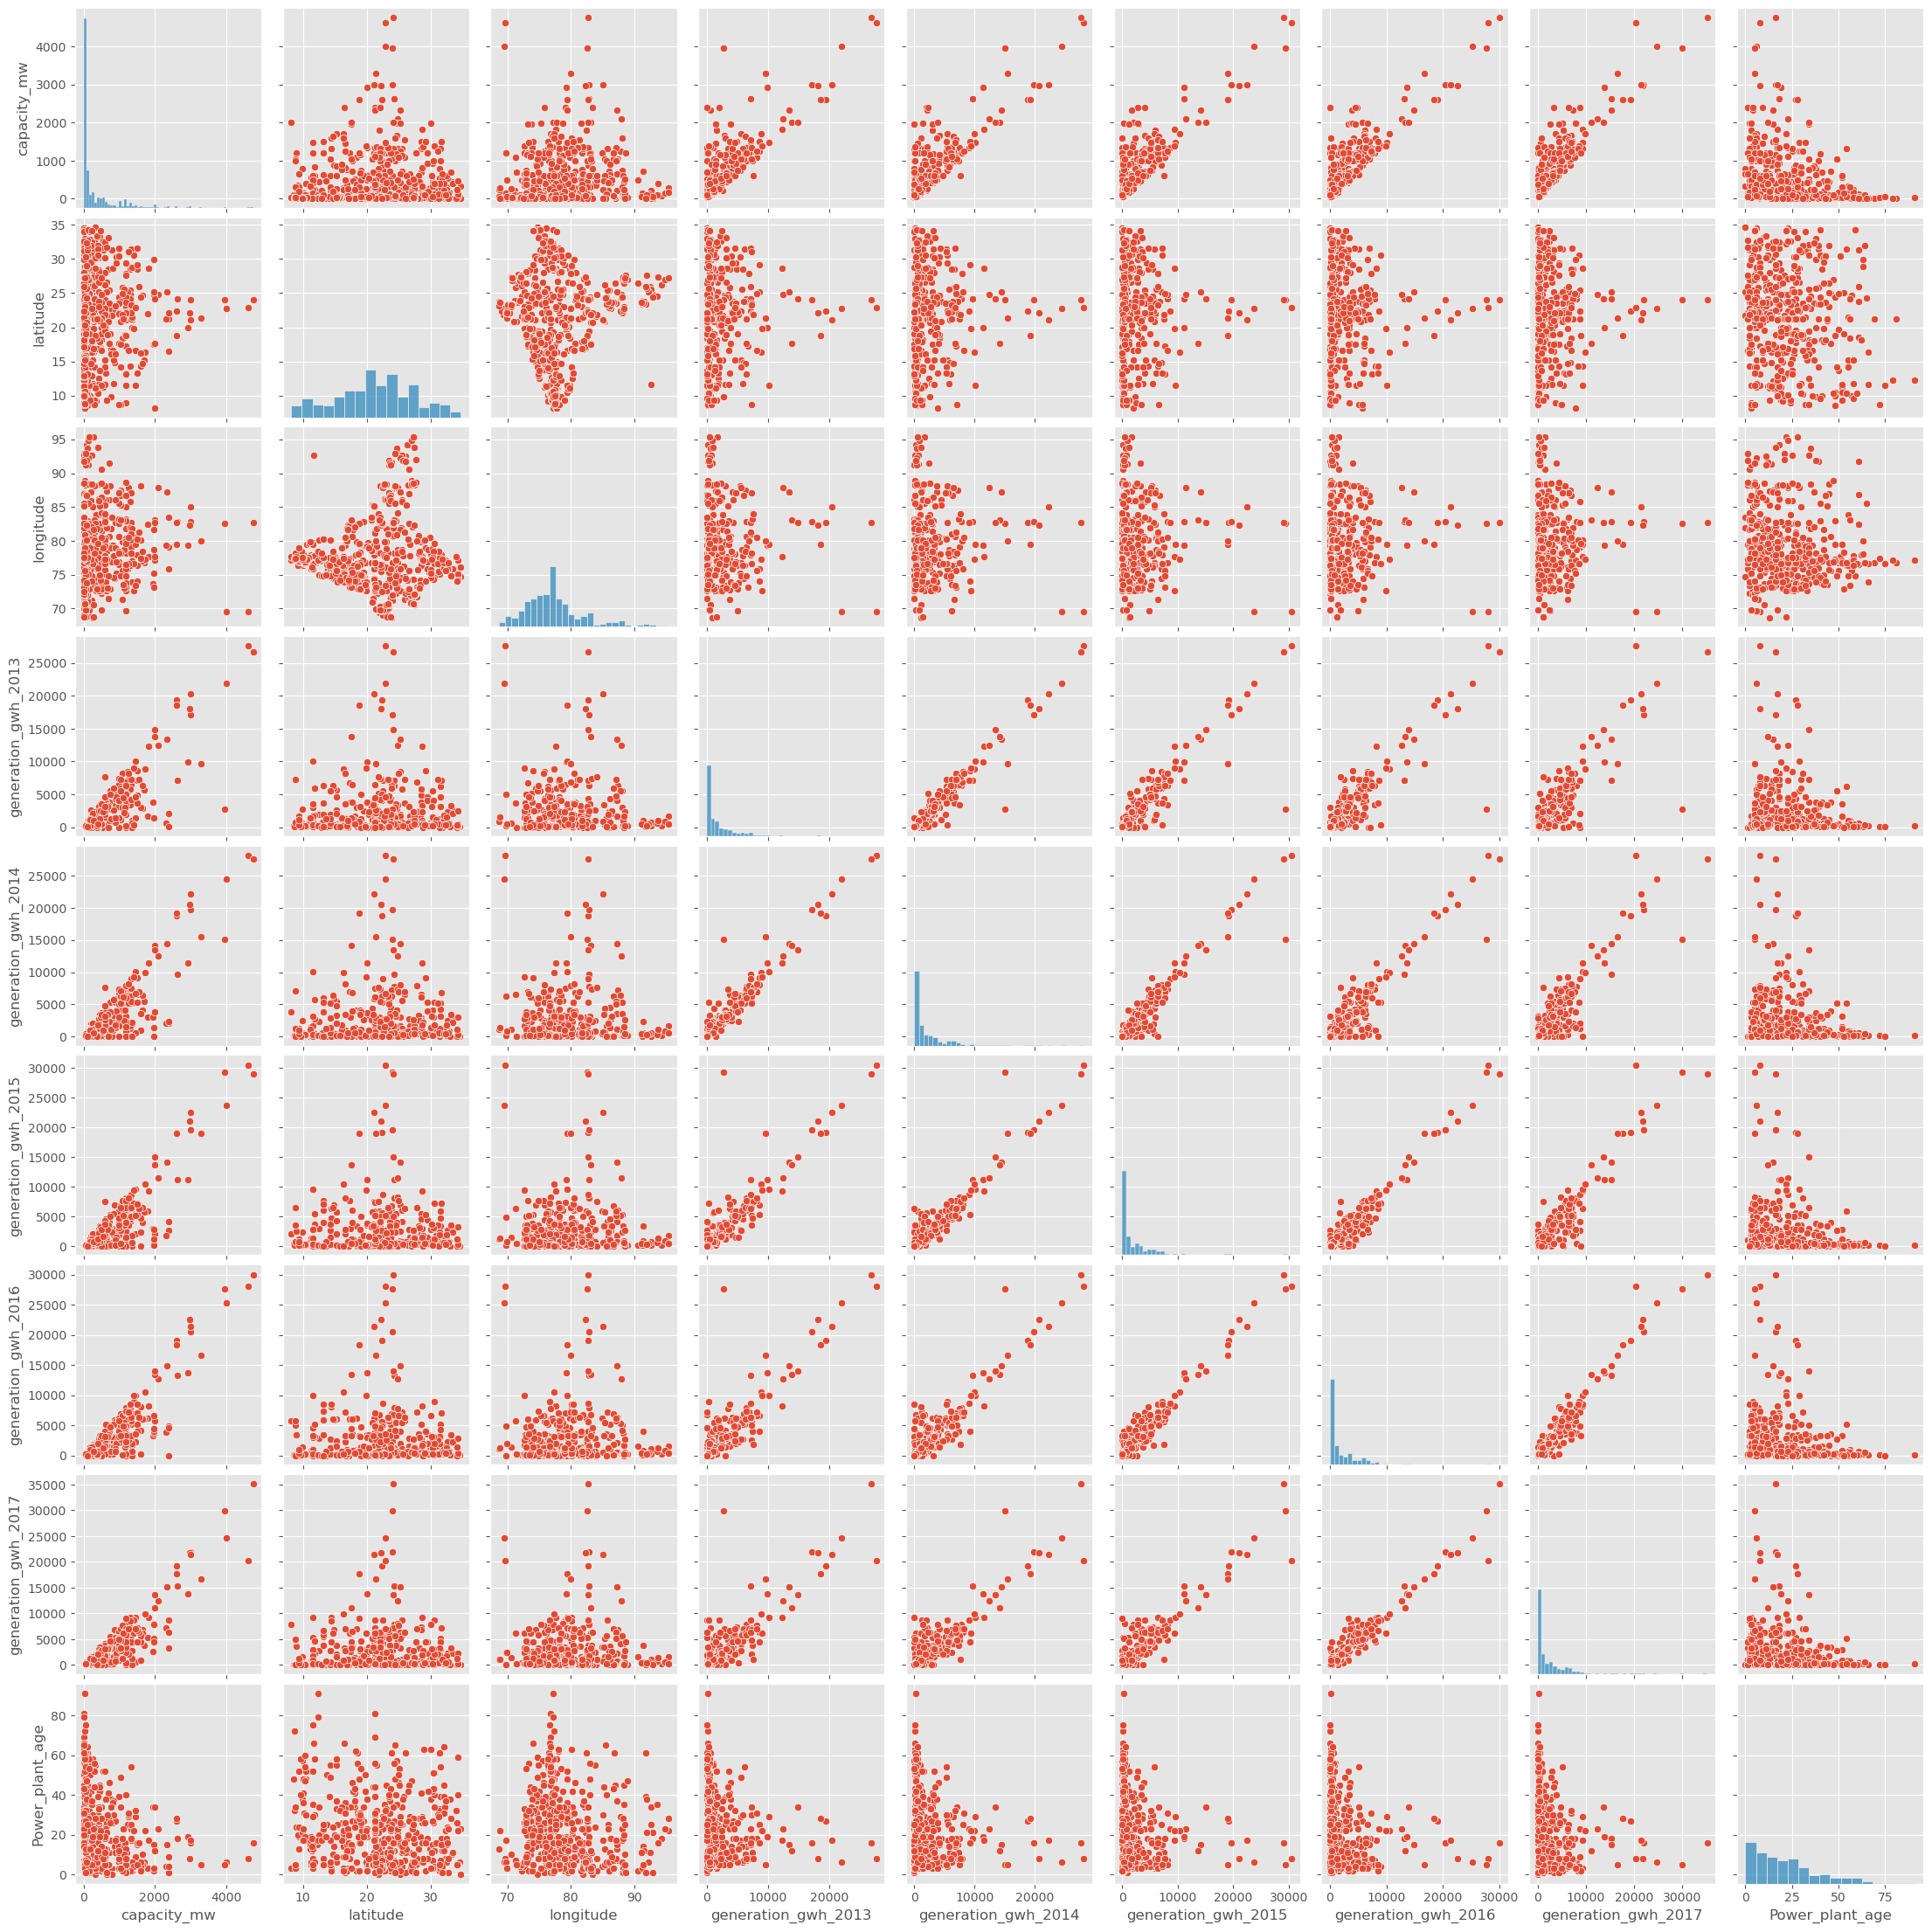

In [39]:
#Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df)

####  Comment:
- Most of the features have strong linear relationship and correlation with each other.
- From the plot we can observe the outliers in some of the columns.
- We can see histogram on the diagonal.

## Encoding categorical data

In [40]:
df.drop(columns=['name'],axis=1,inplace=True)

In [41]:
df.drop(columns=['generation_data_source'],axis=1,inplace=True)

In [42]:
Category=['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [43]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

capacity_mw  latitude  longitude  primary_fuel  other_fuel1  source  \
0          2.5   28.1839    73.2407             6            3     109   
1         98.0   24.7663    74.6090             1            3     174   
2         39.2   21.9038    69.3732             7            3      21   
3        135.0   23.8712    91.3602             2            3      22   
4       1800.0   21.9603    82.4091             1            2      22   

   geolocation_source  generation_gwh_2013  generation_gwh_2014  \
0                   1                  NaN                  NaN   
1                   2                  NaN                  NaN   
2                   2                  NaN                  NaN   
3                   2           631.777928           617.789264   
4                   2          1668.290000          3035.550000   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3              843.747           886.004428           663.774500   
4             5916.370          6243.000000          5385.579736   

   Power_plant_age  
0              7.0  
1              NaN  
2              NaN  
3             14.0  
4              3.0

### Outliers detection and removal

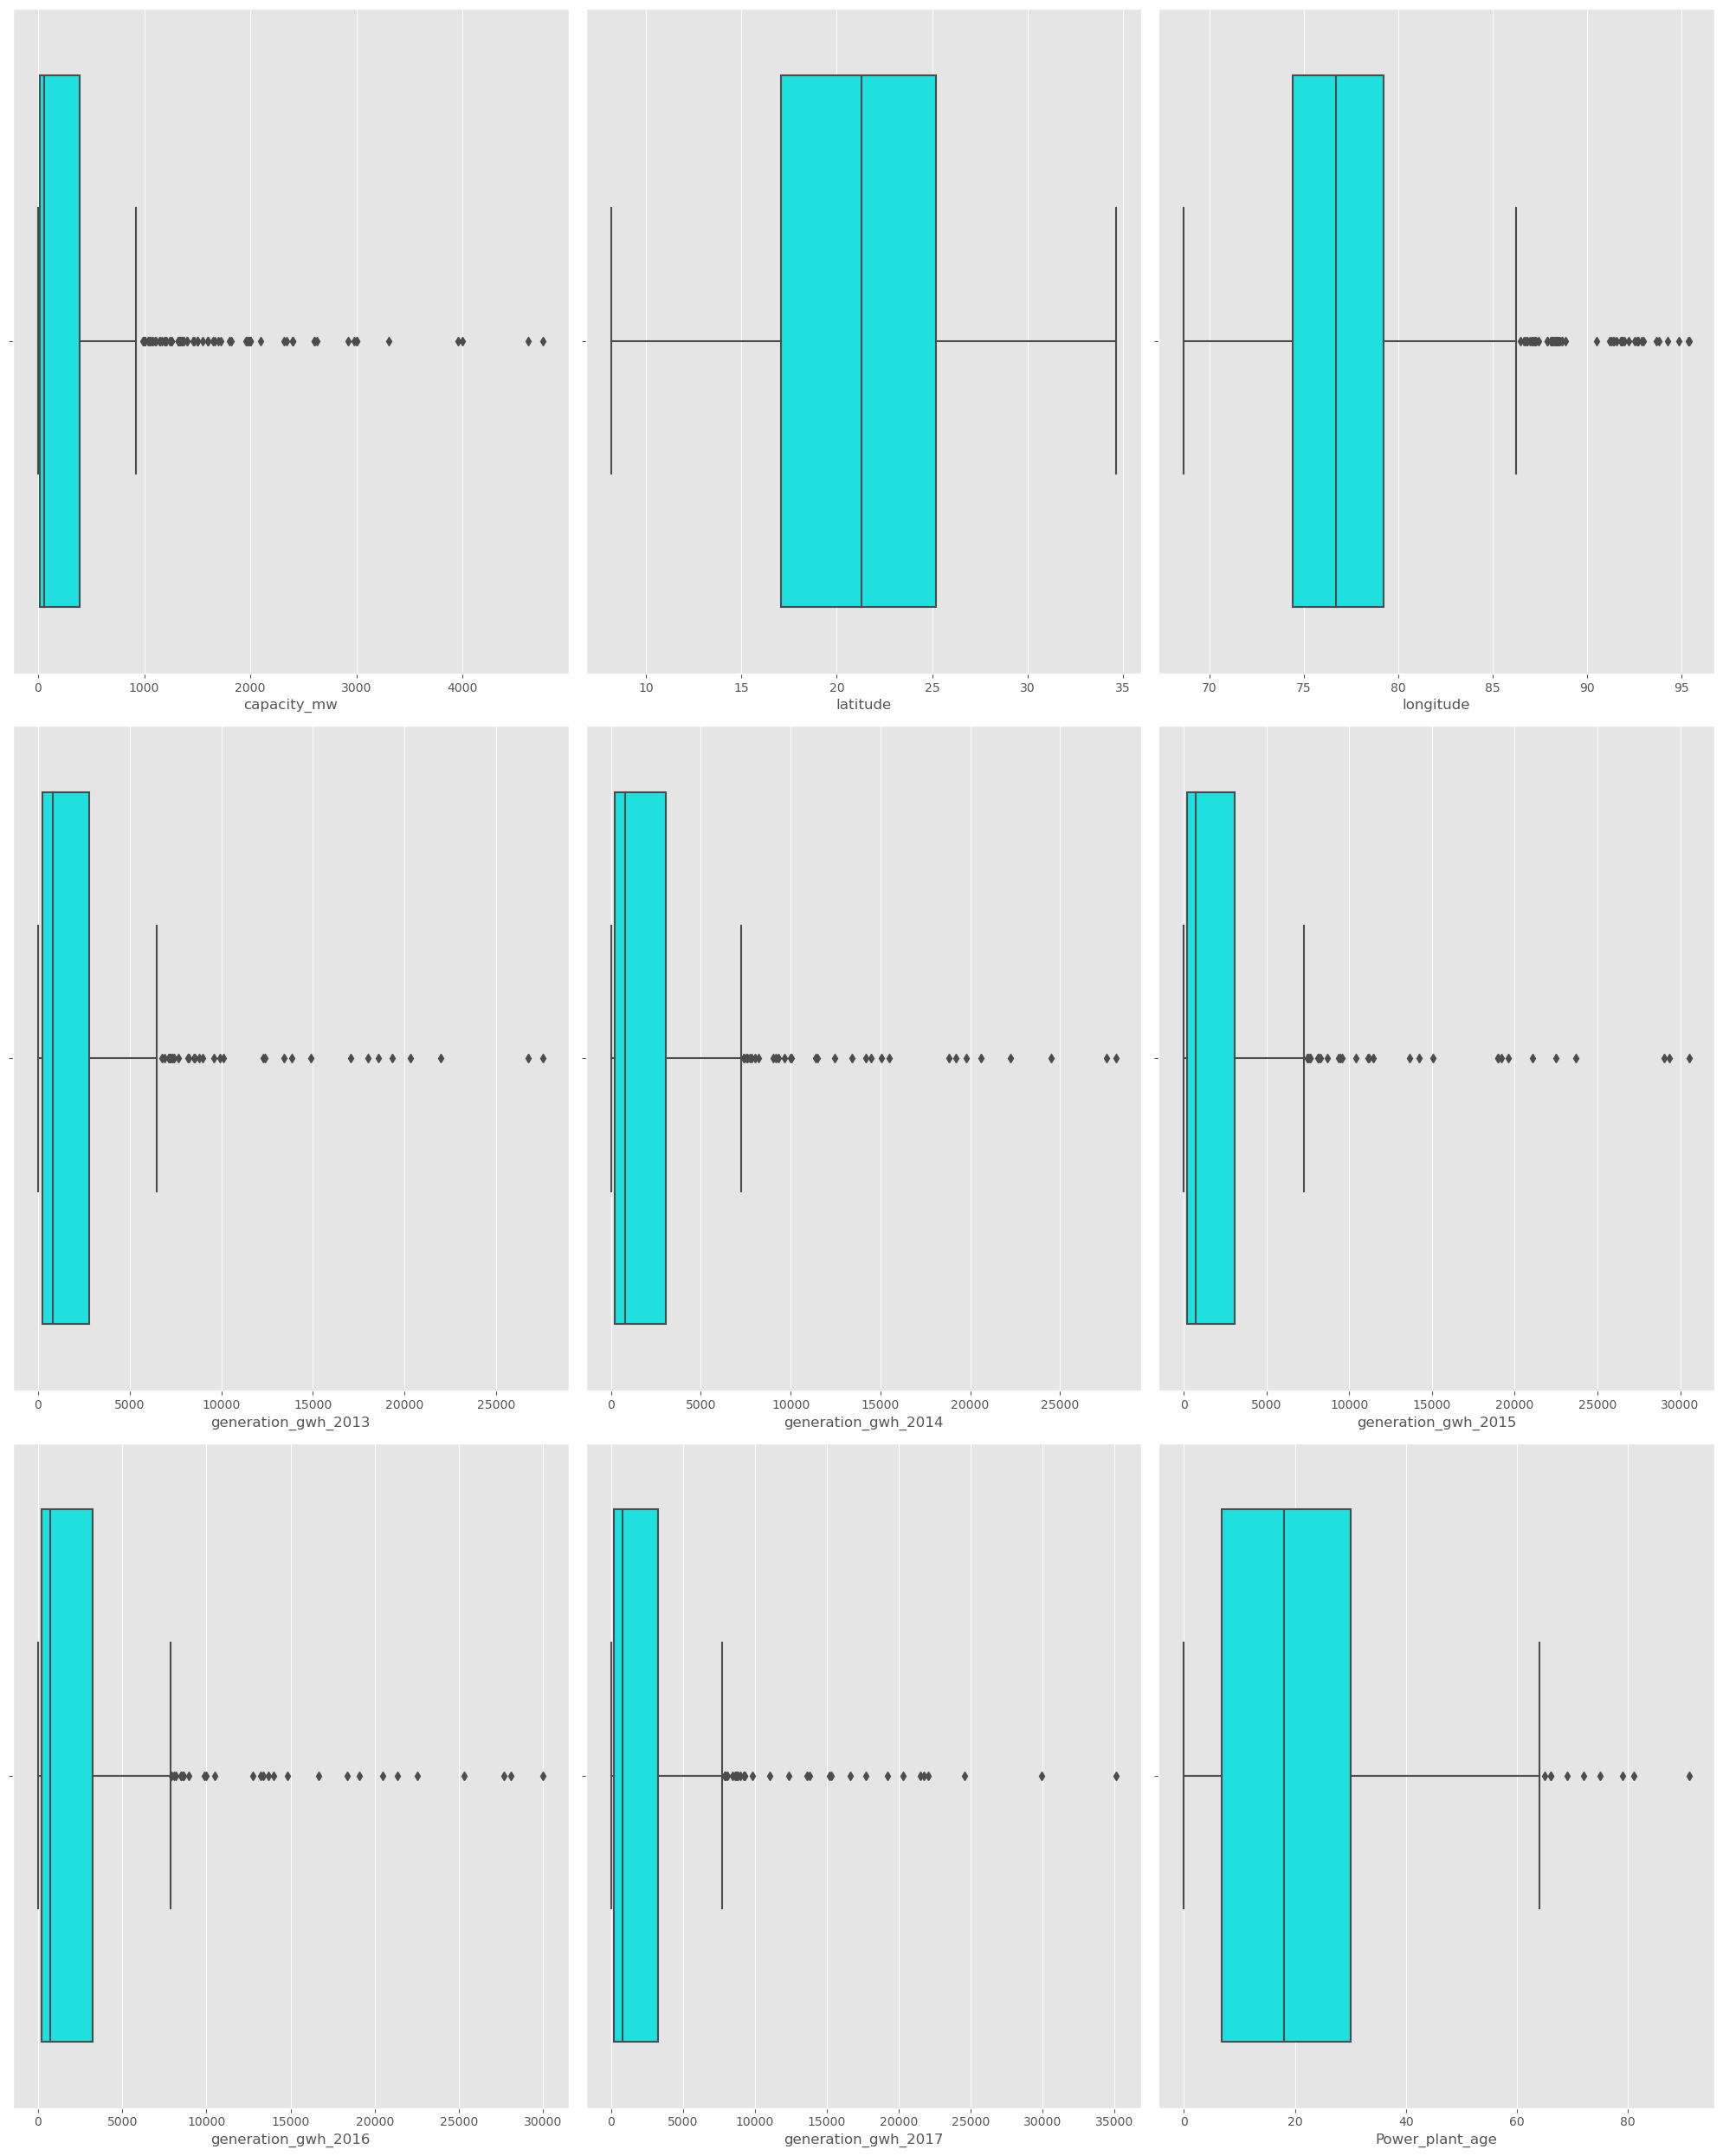

In [44]:
# Identifying the outliers present in numerical columns using boxplot

plt.figure(figsize=(20,25))
plotnumber=1
for col in Numerical:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[col],color='cyan')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.tight_layout()

#### Comment :
- There outliers exist in data.
- There are no outliers in lower capping level.
- So we will use Quantile-based Flooring and Capping technique.

### Further outliers investigation will be done bases Quantile-based Flooring and Capping technique. In this technique, we will do the flooring (e.g., the 10th percentile) for the lower values and capping (e.g., the 75th percentile) for the higher values

In [45]:
# Removal of unnessary columns
df.drop(columns=['source','geolocation_source'],axis=1,inplace=True)

In [46]:
df2=df.copy

In [47]:
df3=df.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             660.000000
latitude                 19.212970
longitude                13.258160
primary_fuel              6.000000
other_fuel1               3.000000
generation_gwh_2013    4600.499035
generation_gwh_2014    5260.710000
generation_gwh_2015    5078.485600
generation_gwh_2016    5200.793260
generation_gwh_2017    5610.347700
Power_plant_age          39.000000
dtype: float64


In [48]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(876, 11)


##### Data Loss

In [49]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((908-876)/876)*100,'%')

Percentage Data Loss : 3.65296803652968 %


### Correlation matrix

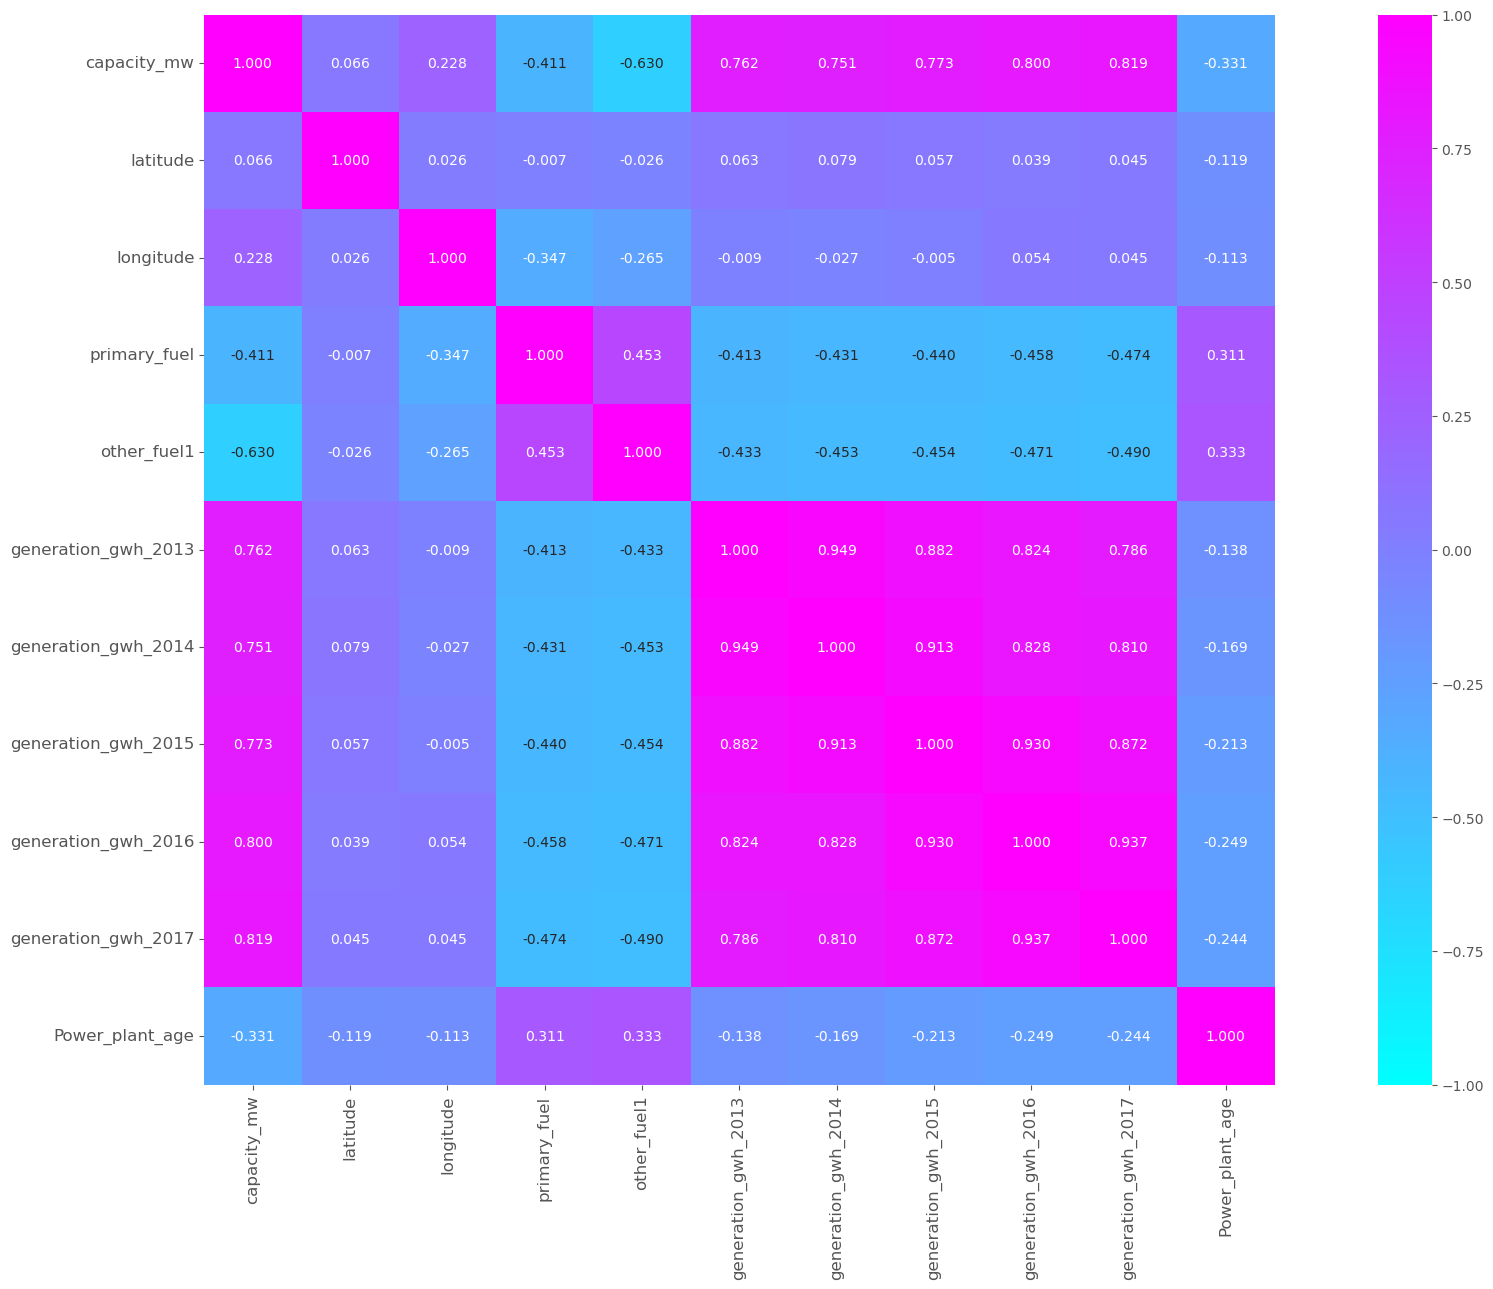

In [50]:
plt.figure(figsize=(21,13))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="cool")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- The label capacity_mw is highly positively  correlated with the features generation_gwh_2017,generation_gwh_2016,generation_gwh_2015,generation_gwh_2014,generation_gwh_2013.
- capaity is negatively correlated with the features primary_fuel, source and Powe_plant_age.

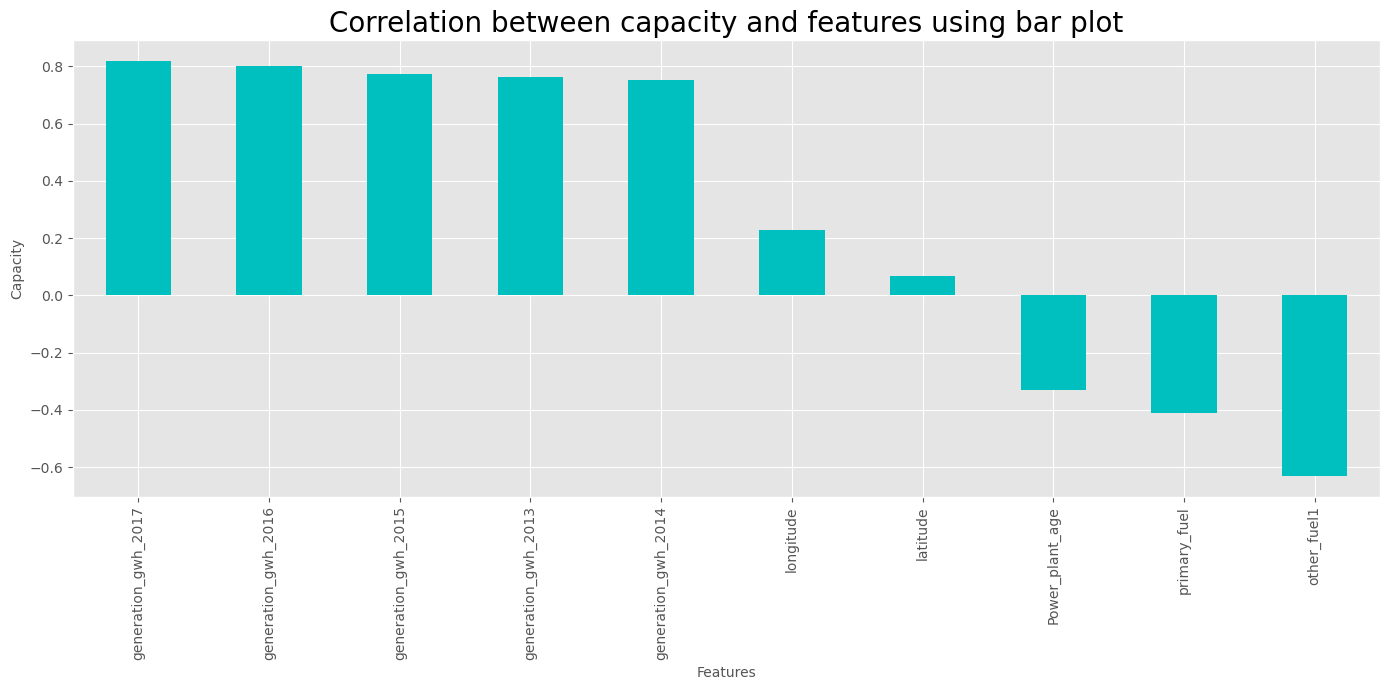

In [51]:
plt.figure(figsize=(14,7))
data.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Capacity',fontsize=10)
plt.title('Correlation between capacity and features using bar plot',fontsize=20)
plt.show()

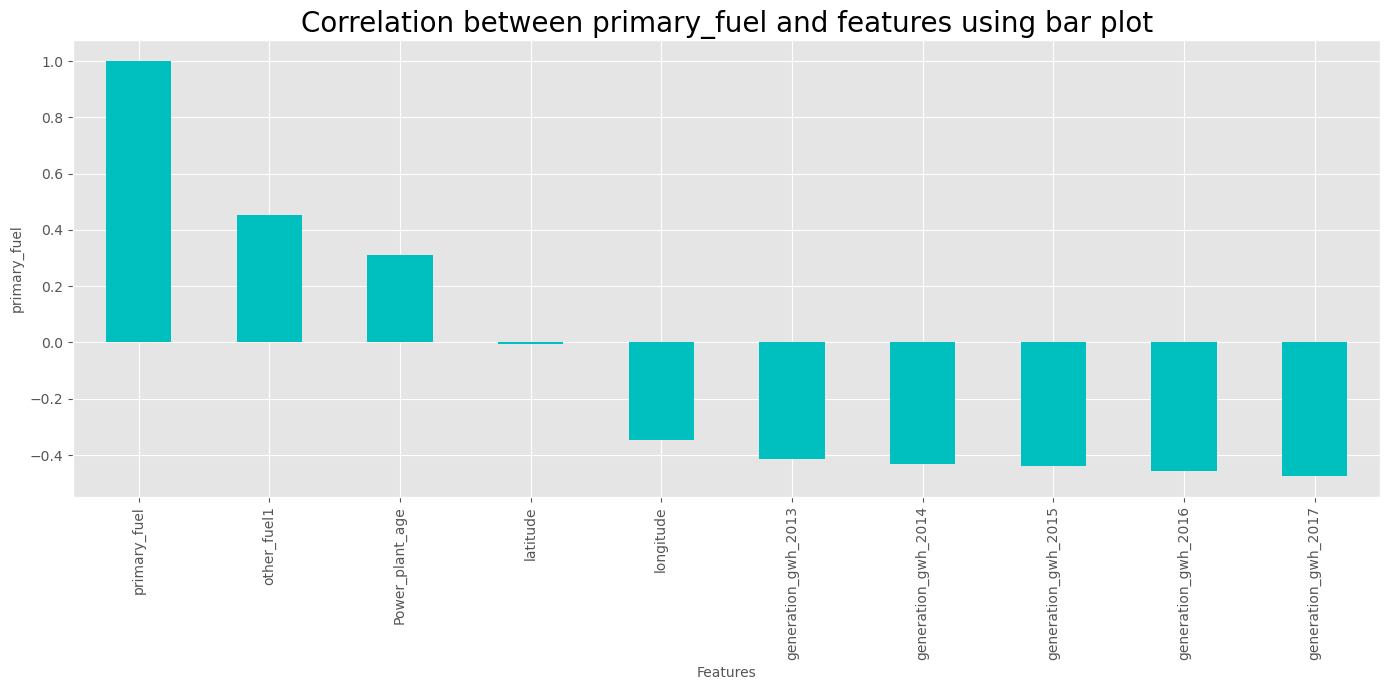

In [52]:
plt.figure(figsize=(14,7))
data.corr()['primary_fuel'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=10)
plt.ylabel('primary_fuel',fontsize=10)
plt.title('Correlation between primary_fuel and features using bar plot',fontsize=20)
plt.show()

## Skewness

In [53]:
data.skew()

capacity_mw            1.916893
latitude              -0.131807
longitude              1.212556
primary_fuel           0.421089
other_fuel1           -1.840569
generation_gwh_2013    1.669040
generation_gwh_2014    1.623857
generation_gwh_2015    1.530908
generation_gwh_2016    1.604813
generation_gwh_2017    1.495215
Power_plant_age        1.014046
dtype: float64

In [54]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')

In [55]:
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

longitude  other_fuel1  generation_gwh_2013  generation_gwh_2014  \
0  -0.932286     0.492496                  NaN                  NaN   
1  -0.514929     0.492496                  NaN                  NaN   
2  -2.413541     0.492496                  NaN                  NaN   
3   2.178041     0.492496            -0.110987            -0.108987   
5  -2.753369    -2.030073             0.043362             0.256249   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3             0.123448             0.149212            -0.027733   
5             0.333265             0.315123             0.279015   

   Power_plant_age  
0        -0.833031  
1              NaN  
2              NaN  
3        -0.198032  
5        -0.273345

In [61]:
# checking skewness after using yeo-johnson
data.skew()

capacity_mw            1.916893
latitude              -0.131807
longitude              0.000859
primary_fuel           0.421089
generation_gwh_2013   -0.104089
generation_gwh_2014   -0.131641
generation_gwh_2015   -0.143899
generation_gwh_2016   -0.137670
generation_gwh_2017   -0.154677
Power_plant_age       -0.074023
dtype: float64

In [63]:
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

#### Since we have done with EDA NOW its time for removal of missing data 

In [64]:
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

# Machine Learning Model Building Classification

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

## Standard Scaling

In [66]:
# Splitting data in target and dependent feature
X = data.drop(['primary_fuel'], axis =1)
Y = data['primary_fuel']

In [67]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [68]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (613, 4)
Training target vector size: (613,)
Test feature matrix size: (263, 4)
Test target vector size: (263,)


### Finding best Random state

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,1000):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.5817490494296578 on Random_state 737


## Logistics Regression Model

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.5817490494296578


Confusion matrix of Logistics Regression : 
 [[ 0  0  0  0  0  0  0  9]
 [ 0 48  0 19  0  0  7  2]
 [ 0  5  0  8  0  0  0  6]
 [ 0 14  0 50  0  0  5  6]
 [ 0  0  0  2  0  0  0  0]
 [ 0  0  0  4  0  0  0  1]
 [ 0  0  0  5  0  0 26  3]
 [ 0  2  0  3  0  0  9 29]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.70      0.63      0.66        76
           2       0.00      0.00      0.00        19
           3       0.55      0.67      0.60        75
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.55      0.76      0.64        34
           7       0.52      0.67      0.59        43

    accuracy                           0.58       263
   macro avg       0.29      0.34      0.31       

### Decision Tree Classifier

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
y_pred=dtc.predict(X_test)
print('\033[1m'+'DecisionTreeClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of DecisionTreeClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of DecisionTreeClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of DecisionTreeClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

DecisionTreeClassifier Evaluation


Accuracy Score of DecisionTreeClassifier : 0.6577946768060836


Confusion matrix of DecisionTreeClassifier : 
 [[ 8  0  0  0  0  0  0  1]
 [ 1 43 10 15  1  1  1  4]
 [ 0  5  5  3  2  3  0  1]
 [ 0  3  9 59  3  1  0  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  1  3  0  1  0  0]
 [ 1  0  0  0  0  0 26  7]
 [ 2  3  0  0  0  2  5 31]]


classification Report of DecisionTreeClassifier 
               precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.80      0.57      0.66        76
           2       0.19      0.26      0.22        19
           3       0.73      0.79      0.76        75
           4       0.00      0.00      0.00         2
           5       0.12      0.20      0.15         5
           6       0.81      0.76      0.79        34
           7       0.70      0.72      0.71        43

    accuracy                           0.66       263
   macro avg       0.50      0.52      0.5

### Random Forest Classifier

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
y_pred=rfc.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of RandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.7604562737642585


Confusion matrix of RandomForestClassifier : 
 [[ 9  0  0  0  0  0  0  0]
 [ 0 57  3 11  0  0  2  3]
 [ 1  6  5  4  0  2  0  1]
 [ 0  4  3 67  0  0  1  0]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  1  3  0  1  0  0]
 [ 0  1  0  0  0  0 29  4]
 [ 5  0  0  0  0  0  6 32]]


classification Report of RandomForestClassifier 
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         9
           1       0.84      0.75      0.79        76
           2       0.38      0.26      0.31        19
           3       0.78      0.89      0.83        75
           4       0.00      0.00      0.00         2
           5       0.33      0.20      0.25         5
           6       0.76      0.85      0.81        34
           7       0.80      0.74      0.77        43

    accuracy                           0.76       263
   macro avg       0.56      0.59      0.5

### ExtraTreesClassifier()

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=737, test_size=.3)
etc=ExtraTreesClassifier()
etc.fit(X_train,Y_train)
y_pred=etc.predict(X_test)
print('\033[1m'+'ExtraTreesClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of ExtraTreesClassifier :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of ExtraTreesClassifier :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of ExtraTreesClassifier'+'\033[0m \n',classification_report(Y_test, y_pred))

ExtraTreesClassifier Evaluation


Accuracy Score of ExtraTreesClassifier : 0.752851711026616


Confusion matrix of ExtraTreesClassifier : 
 [[ 7  0  0  0  0  0  0  2]
 [ 0 52  5 15  0  0  3  1]
 [ 1  6  8  1  0  3  0  0]
 [ 0  6  1 66  0  0  1  1]
 [ 0  0  1  1  0  0  0  0]
 [ 0  0  1  2  0  2  0  0]
 [ 0  2  0  0  0  0 30  2]
 [ 4  1  0  0  0  0  5 33]]


classification Report of ExtraTreesClassifier 
               precision    recall  f1-score   support

           0       0.58      0.78      0.67         9
           1       0.78      0.68      0.73        76
           2       0.50      0.42      0.46        19
           3       0.78      0.88      0.82        75
           4       0.00      0.00      0.00         2
           5       0.40      0.40      0.40         5
           6       0.77      0.88      0.82        34
           7       0.85      0.77      0.80        43

    accuracy                           0.75       263
   macro avg       0.58      0.60      0.59       2

## Crossvalidation

In [74]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
       DecisionTreeClassifier(),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.53409091 0.48       0.52571429 0.53142857 0.52      ]
Mean Score : 0.5182467532467533
Std deviation : 0.019730431593058796




Cross Validation Score DecisionTreeClassifier() :

Score : [0.70454545 0.63428571 0.74285714 0.69142857 0.69142857]
Mean Score : 0.6929090909090909
Std deviation : 0.03484622508873421




Cross Validation Score RandomForestClassifier() :

Score : [0.73863636 0.77714286 0.80571429 0.76571429 0.74285714]
Mean Score : 0.766012987012987
Std deviation : 0.024436975984023




Cross Validation Score ExtraTreesClassifier() :

Score : [0.75568182 0.75428571 0.8        0.78285714 0.76      ]
Mean Score : 0.7705649350649351
Std deviation : 0.01797586977255748




#### We can see that  RandomForestClassifier() gives us good Accuracy and maximum f1 score along with best Cross-validation score.  we will apply Hyperparameter tuning on Random Forest model and Used it as final model.

# Hyper Parameter Tuning : GridSearchCV

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}

In [77]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,verbose=5)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.634 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.626 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.675 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.607 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.689 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.642 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=10;, score=0.634 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, ma

[CV 2/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.683 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.732 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.672 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=5, max_features=log2, n_estimators=70;, score=0.787 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.675 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.667 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.642 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=auto, n_estimators=5;, score=0.648 total time=

[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.732 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.756 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.713 total time=   0.2s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=60;, score=0.787 total time=   0.3s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.715 total time=   0.3s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.707 total time=   0.2s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.748 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=10, max_features=log2, n_estimators=70;, score=0.730 tot

[CV 2/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.732 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.772 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.730 total time=   0.1s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=50;, score=0.787 total time=   0.1s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.756 total time=   0.1s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.724 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.740 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=20, max_features=log2, n_estimators=60;, score=0.730 tot

[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.724 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.780 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.721 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=25;, score=0.762 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.740 total time=   0.2s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.732 total time=   0.1s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.724 total time=   0.1s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=40, max_features=log2, n_estimators=50;, score=0.721 tot

[CV 4/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.721 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=15;, score=0.754 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.691 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.715 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.772 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.721 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=25;, score=0.787 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=50, max_features=log2, n_estimators=50;, score=0.740 tot

[CV 4/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=0.730 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=10;, score=0.746 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.675 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.724 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.689 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=15;, score=0.770 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=gini, max_depth=60, max_features=log2, n_estimators=25;, score=0.724 tot

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.659 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.656 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=10;, score=0.762 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.699 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.650 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.642 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;, score=0.648 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=5, max_features=log2, n_estimators=15;,

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.699 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.680 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=10;, score=0.730 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.675 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.699 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.748 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimators=15;, score=0.705 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=10, max_features=log2, n_estimat

[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.707 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.675 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.664 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=10;, score=0.770 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.724 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.740 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimators=15;, score=0.740 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=20, max_features=log2, n_estimat

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.732 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.672 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=10;, score=0.738 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.724 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.699 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.699 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimators=15;, score=0.721 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=40, max_features=log2, n_estimat

[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.772 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.724 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.689 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=10;, score=0.738 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.699 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.691 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimators=15;, score=0.748 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=50, max_features=log2, n_estimat

[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.650 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.672 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=10;, score=0.762 total time=   0.0s
[CV 1/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.683 total time=   0.0s
[CV 2/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.715 total time=   0.0s
[CV 3/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.707 total time=   0.0s
[CV 4/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimators=15;, score=0.705 total time=   0.0s
[CV 5/5] END bootstrap=True, criterion=entropy, max_depth=60, max_features=log2, n_estimat

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=5)

In [78]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'auto',
 'n_estimators': 70}

# Final Classification Model

In [79]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='gini',n_estimators=60, max_depth=50 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))


Accuracy Score :
 0.7452471482889734


In [82]:
from sklearn.metrics import roc_auc_score
y_prob = Final_mod.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(Y_test, y_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.942141 (macro),
0.944270 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.952790 (macro),
0.950963 (weighted by prevalence)


In [85]:
pip install scikit-plot

In [86]:

import scikitplot as sktplt

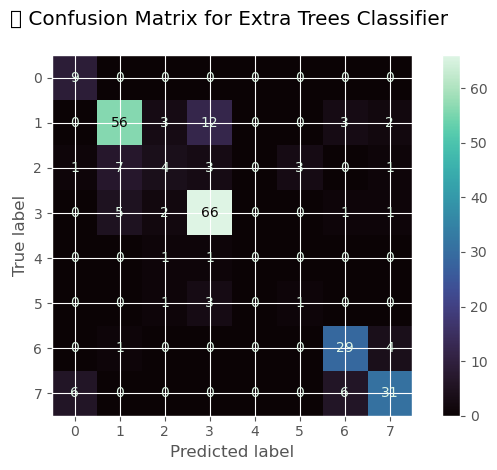

In [87]:
from sklearn import metrics
class_names = df.columns
metrics.plot_confusion_matrix(Final_mod, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for Extra Trees Classifier \n')
plt.show()

#### Saving Model

In [88]:
import joblib
joblib.dump(Final_mod,'global_powerplant_classification_Saurabh Lad.pkl')

['global_powerplant_classification_Saurabh Lad.pkl']

# Machine Learning Model Building Regression

In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso
from xgboost import XGBRegressor

#### Feature Engineering before proceeding

In [90]:
df2=df.copy()

In [91]:
df3=df2.copy()
Q1 = df3.quantile(0)
Q3= df3.quantile(0.85)
IQR = Q3 - Q1
print(IQR)

capacity_mw             660.000000
latitude                 19.212970
longitude                13.258160
primary_fuel              6.000000
other_fuel1               3.000000
generation_gwh_2013    4600.499035
generation_gwh_2014    5260.710000
generation_gwh_2015    5078.485600
generation_gwh_2016    5200.793260
generation_gwh_2017    5610.347700
Power_plant_age          39.000000
dtype: float64


In [92]:
data = df3[~((df3 < (Q1 - 1.5 * IQR)) |(df3 > (Q3 + 1.5 * IQR))).any(axis=1)]
print(data.shape)

(876, 11)


In [93]:
skew = ['longitude','other_fuel1','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
data[skew] = scaler.fit_transform(data[skew].values)
data[skew].head()

longitude  other_fuel1  generation_gwh_2013  generation_gwh_2014  \
0  -0.932286     0.492496                  NaN                  NaN   
1  -0.514929     0.492496                  NaN                  NaN   
2  -2.413541     0.492496                  NaN                  NaN   
3   2.178041     0.492496            -0.110987            -0.108987   
5  -2.753369    -2.030073             0.043362             0.256249   

   generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0                  NaN                  NaN                  NaN   
1                  NaN                  NaN                  NaN   
2                  NaN                  NaN                  NaN   
3             0.123448             0.149212            -0.027733   
5             0.333265             0.315123             0.279015   

   Power_plant_age  
0        -0.833031  
1              NaN  
2              NaN  
3        -0.198032  
5        -0.273345

In [94]:
# We will drop other fuel as result of poor correlation and lot of missing values
data.drop("other_fuel1",axis=1,inplace=True)
# Missing Value Imputation of latitude with mean
data['Power_plant_age'] = data['Power_plant_age'].fillna(data['Power_plant_age'].mean())

In [95]:
data.drop("generation_gwh_2013",axis=1,inplace=True)
data.drop("generation_gwh_2014",axis=1,inplace=True)
data.drop("generation_gwh_2015",axis=1,inplace=True)
data.drop("generation_gwh_2016",axis=1,inplace=True)
data.drop("generation_gwh_2017",axis=1,inplace=True)

## Standard Scaling

In [96]:
# Splitting data in target and dependent feature
X = data.drop(['capacity_mw'], axis =1)
Y = data['capacity_mw']

In [97]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (586, 4)
Training target vector size: (586,)
Test feature matrix size: (290, 4)
Test target vector size: (290,)


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.3085415629079191 on Random_state 664


### Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=91, test_size=.3)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [ 3.10921778e+01  3.17349157e+00  2.12316709e+02 -9.17436813e+00
  1.21043520e+02  3.32184307e+02  3.28814127e+02  3.94013783e+02
  3.84049548e+02  4.84868184e+02  3.05379814e+02  4.61399219e+02
  1.72539123e+02  3.89214282e+02  3.89672380e+02  3.21041050e+02
 -6.35940381e-01  1.03082448e+02  2.11704691e+02 -2.19473705e+01
  1.49209190e+02  2.93086138e+02  3.71763371e+02  2.19560042e+02
  7.82935220e+01  7.11559787e+01 -1.87466054e+01  1.38376659e+01
  5.13172383e+02  2.88626812e+02  7.12025909e+01  1.45900756e+02
  2.38412599e+02  5.20227451e+02  2.65442321e+02  5.59284349e+02
  3.79252390e+02  2.95291092e+02  7.84715582e+01  3.47867739e+02
  3.85894485e+02  3.79080154e+02  1.03997583e+02  1.93148236e+02
  3.32092931e+02  3.57299529e+02  1.03287208e+02  5.74472747e+01
  5.37773415e+02  3.72622657e+00  1.33057791e+02  4.57653460e+02
 -1.81179439e+01  2.62295555e+02  2.26818166e+02  4.43037936e+02
  2.59760526e+02  1.40559743e+01  3.69695820e+02  4.52336743e+02
  2.7600

In [101]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 212.40439629109824
Mean squared error : 97193.95421536386
Root Mean Squared Error: 311.75944927999194


 R2 Score :
0.30387524814512923


### Applying other ML Models

In [102]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
adb=AdaBoostRegressor(learning_rate=0.1)
gradb=GradientBoostingRegressor()
rd=Ridge(alpha=0.01)
xgb=XGBRegressor()
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 136.54801651865472
Mean squared error : 54394.07146576973
Root Mean Squared Error: 233.22536625712422


 R2 Score :
0.6104175428691472


 Error of  Ridge(alpha=0.01) :
Mean absolute error : 212.40454057164374
Mean squared error : 97194.13310884532
Root Mean Squared Error: 311.7597361893375


 R2 Score :
0.3038739668701632


 Error of  DecisionTreeRegressor() :
Mean absolute error : 165.1025475285171
Mean squared error : 97790.82054027377
Root Mean Squared Error: 312.71523874009364


 R2 Score :
0.29960035856302847


 Error of  AdaBoostRegressor(learning_rate=0.1) :
Mean absolute error : 168.85546951247238
Mean squared error : 61484.93241513325
Root Mean Squared Error: 247.96155430859287


 R2 Score :
0.5596312171283966


 Error of  GradientBoostingRegressor() :
Mean absolute error : 141.57312761482245
Mean squared error : 51590.60132662954
Root Mean Squared Error: 227.13564521366862


 R2 Score :
0.6304966205308832


 Error o

In [103]:
# Cross Validation
model = [rf,rd,dtc,adb,gradb,xgb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : 0.510708056656829


Cross Validation Score : Ridge(alpha=0.01) :

Mean CV Score : 0.2153314439398975


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : 0.16674531632125777


Cross Validation Score : AdaBoostRegressor(learning_rate=0.1) :

Mean CV Score : 0.4576083113451491


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : 0.4734039228537267


Cross Validation Score : XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_de

#### Among all Model Random Forest Regressor gave us maximum R2 score  and minimum  RMSE value  . So We will perform Hyper Parameter Tuning on Random Forest Regressor.

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
parameter = {'n_estimators':[50,60,80],'max_depth': [10,20,40],
            'criterion':['mse','mae'],'min_samples_leaf': [5,10,15],
             'min_samples_split':[5,10,15,20],
             'max_features':["auto","sqrt","log2"]}

In [106]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,verbose = 5)

In [107]:
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.503 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.447 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.418 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.234 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.200 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.509 total time=   0.1s
[CV 2/5] END criterion=mse, ma

[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.534 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.481 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.428 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.287 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.228 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.525 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_sa

[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.514 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.508 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.358 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.310 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.229 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.517 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=10, 

[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.533 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.509 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.388 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.312 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.242 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.539 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=auto, min_samples_leaf=15, 

[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.245 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.525 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.459 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.387 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.349 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.218 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.309 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.245 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.521 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.466 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.369 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.290 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=10, 

[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.337 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.321 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.210 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.483 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.445 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.326 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=sqrt, min_samples_leaf=15, 

[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.455 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.384 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.334 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.230 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.507 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.459 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=5, min_sam

[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.506 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.437 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.366 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.316 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.215 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.493 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=10, 

[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.482 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.430 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.329 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.309 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=5, n_estimators=80;, score=0.196 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.491 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=10, max_features=log2, min_samples_leaf=15, min_s

[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.243 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.495 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.454 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.424 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.253 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=60;, score=0.238 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_s

[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.287 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.220 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.490 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.525 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.399 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=50;, score=0.303 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_sa

[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.293 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.220 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.506 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.498 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.383 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=80;, score=0.320 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=10, 

[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.339 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.224 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.542 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.498 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.386 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=60;, score=0.340 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=auto, min_samples_leaf=15, 

[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.364 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=15, n_estimators=80;, score=0.226 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.507 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.460 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.388 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.375 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.372 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.332 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=60;, score=0.213 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.506 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.454 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.344 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=10, 

[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.306 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=50;, score=0.212 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.496 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.433 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.345 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.305 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=sqrt, min_samples_leaf=15, 

[CV 3/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.396 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.321 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=10, n_estimators=80;, score=0.239 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.516 total time=   3.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.465 total time=   0.3s
[CV 3/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.380 total time=   0.5s
[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=5, min_sam

[CV 3/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.360 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.287 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=60;, score=0.240 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.510 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.448 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.341 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=10, 

[CV 3/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.324 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.304 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=50;, score=0.205 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.479 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.430 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.332 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=20, max_features=log2, min_samples_leaf=15, 

[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.425 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.255 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=80;, score=0.232 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.507 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.464 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.450 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=5, min_sample

[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.392 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.294 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=60;, score=0.233 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.506 total time=   0.2s
[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.508 total time=   0.2s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.380 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=10, min_sa

[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.504 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.394 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.340 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.229 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.524 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.495 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_sa

[CV 1/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.521 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.485 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.382 total time=   0.2s
[CV 4/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.346 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.234 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.528 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min

[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=50;, score=0.224 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.508 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.473 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.382 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.355 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.238 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.318 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=80;, score=0.223 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.511 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.444 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.364 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.292 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=10, 

[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.321 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=60;, score=0.186 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.488 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.444 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.312 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.308 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=sqrt, min_samples_leaf=15, 

[CV 4/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.352 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.239 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.525 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.441 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.370 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.369 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=5, min_sam

[CV 4/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.324 total time=   0.1s
[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.227 total time=   0.1s
[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.527 total time=   0.0s
[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.468 total time=   0.0s
[CV 3/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.355 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.303 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=10, 

[CV 3/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.349 total time=   0.0s
[CV 4/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.297 total time=   0.0s
[CV 5/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.211 total time=   0.0s
[CV 1/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.505 total time=   0.1s
[CV 2/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.435 total time=   0.1s
[CV 3/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.322 total time=   0.1s
[CV 4/5] END criterion=mse, max_depth=40, max_features=log2, min_samples_leaf=15, 

[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.437 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.429 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.307 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.231 total time=   0.5s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.538 total time=   0.6s
[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.435 total time=   0.5s
[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=5, min_sam

[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.499 total time=   0.5s
[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.438 total time=   0.5s
[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.356 total time=   0.5s
[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.249 total time=   0.5s
[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.194 total time=   0.5s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.486 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=10, min_s

[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.192 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.538 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.406 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.364 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.295 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.208 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_sa

[CV 4/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.321 total time=   0.5s
[CV 5/5] END criterion=mae, max_depth=10, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.190 total time=   0.5s
[CV 1/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.539 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.409 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.363 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.357 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_sampl

[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.340 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.339 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.198 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.474 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.405 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.362 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.372 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.304 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.318 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.186 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.506 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.328 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=10, 

[CV 1/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.444 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.280 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.280 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.262 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.165 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.432 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=sqrt, min_samples_leaf=15, 

[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.183 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.506 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.389 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.364 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.357 total time=   0.5s
[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.219 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=5, min_sam

[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.309 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.179 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.470 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.361 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.296 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.291 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=10, 

[CV 3/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.292 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.241 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.168 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.428 total time=   0.5s
[CV 2/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.284 total time=   0.5s
[CV 3/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.262 total time=   0.5s
[CV 4/5] END criterion=mae, max_depth=10, max_features=log2, min_samples_leaf=15, 

[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.411 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.413 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.303 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.217 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.536 total time=   0.5s
[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.425 total time=   0.5s
[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=5, min_sam

[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.487 total time=   0.6s
[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.472 total time=   0.7s
[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.348 total time=   0.6s
[CV 4/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.294 total time=   0.6s
[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.216 total time=   0.6s
[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.456 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=10, min_s

[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.206 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.517 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.424 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.360 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.272 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.195 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_sa

[CV 4/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.312 total time=   0.5s
[CV 5/5] END criterion=mae, max_depth=20, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.195 total time=   0.5s
[CV 1/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.538 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.438 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.371 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.336 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_sampl

[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.372 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.332 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.207 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.530 total time=   0.5s
[CV 2/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.391 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.360 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 2/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.345 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.338 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.300 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.195 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.477 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.358 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=10, 

[CV 1/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.398 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.287 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.256 total time=   0.4s
[CV 4/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.264 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.170 total time=   0.5s
[CV 1/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.417 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=20, max_features=sqrt, min_samples_leaf=15, 

[CV 5/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.237 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.542 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.419 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.362 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.344 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.181 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=5, min_sam

[CV 4/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.294 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.210 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.490 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.290 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.294 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.290 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=10, 

[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.282 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.289 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.170 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.425 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.299 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.262 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=20, max_features=log2, min_samples_leaf=15, 

[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.429 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.393 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.320 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=50;, score=0.198 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.492 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=60;, score=0.436 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=5, min_sam

[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.496 total time=   0.5s
[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.453 total time=   0.5s
[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.344 total time=   0.5s
[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.267 total time=   0.5s
[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=80;, score=0.218 total time=   0.5s
[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=50;, score=0.489 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=10, min_s

[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=50;, score=0.186 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.540 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.401 total time=   0.4s
[CV 3/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.364 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.313 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=5, n_estimators=60;, score=0.199 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_sa

[CV 4/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.309 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=40, max_features=auto, min_samples_leaf=15, min_samples_split=20, n_estimators=80;, score=0.207 total time=   0.4s
[CV 1/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.529 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.429 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.378 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=50;, score=0.320 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_sampl

[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.369 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.323 total time=   0.3s
[CV 5/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=60;, score=0.237 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.494 total time=   0.4s
[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.388 total time=   0.5s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, n_estimators=80;, score=0.357 total time=   0.5s
[CV 4/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=5, min_sam

[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.393 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.322 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.325 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=50;, score=0.169 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.471 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=60;, score=0.337 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=10, 

[CV 1/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.423 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.296 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.249 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.279 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=15, n_estimators=80;, score=0.178 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, min_samples_split=20, n_estimators=50;, score=0.394 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=40, max_features=sqrt, min_samples_leaf=15, 

[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=50;, score=0.216 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.522 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.408 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.355 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.335 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_samples_split=15, n_estimators=60;, score=0.185 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=5, min_sam

[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.270 total time=   0.4s
[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=10, n_estimators=80;, score=0.191 total time=   0.3s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.480 total time=   0.2s
[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.350 total time=   0.2s
[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.326 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, min_samples_split=15, n_estimators=50;, score=0.314 total time=   0.1s
[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=10, 

[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.287 total time=   0.2s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.260 total time=   0.2s
[CV 5/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=60;, score=0.162 total time=   0.2s
[CV 1/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.421 total time=   0.3s
[CV 2/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.287 total time=   0.3s
[CV 3/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, min_samples_split=10, n_estimators=80;, score=0.251 total time=   0.3s
[CV 4/5] END criterion=mae, max_depth=40, max_features=log2, min_samples_leaf=15, 

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [5, 10, 15, 20],
                         'n_estimators': [50, 60, 80]},
             verbose=5)

In [108]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 60}

## Final Regression Model

In [109]:
from sklearn.ensemble import RandomForestRegressor
Final_mod =  RandomForestRegressor(n_estimators=80 ,criterion = 'mse', max_depth= 40, max_features = 'sqrt',
             min_samples_leaf = 5, min_samples_split = 10)
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 141.99550229892427
Mean squared error : 52167.591193492764
Root Mean Squared Error: 228.4022574176813


 R2 Score of Final Model :
0.6263640905691642




 True Values Vs Predicted Value plot :


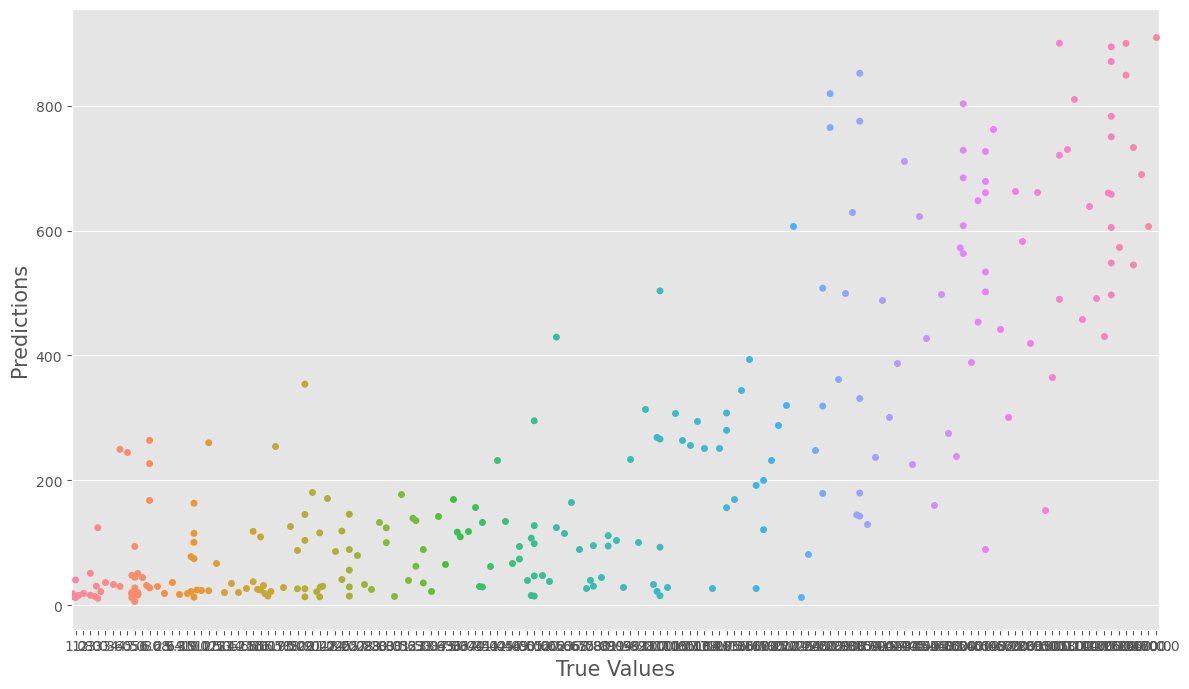

In [110]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

## Final Regression Saving Model

In [111]:
import joblib
joblib.dump(Final_mod,'Global Powerplant_regression_Saurabh Lad_Final.pkl')

['Global Powerplant_regression_Saurabh Lad_Final.pkl']